# Assessment 3 - A new tool for detecting prostate cancers
### Authors: Jeffrey Mills (28083938), 

**Required Libraries -** The following R libraries are referenced in this notebook
* glmnet
* ROCR
---
### Table of Contents

[1. Exploratory Data Analysis](#1.-Exploratory-Data-Analysis)

[2. EDA Report](#2.-EDA-Report)

[3. XGBoost](#3.-XGBoost)

[4. Random Forest](#4.-Random-Forest)

[5. Deep Learning](#5.-Deep-Learning)

[6. Turbo Boost](#6.-Turbo-Boost)

[7. KNN Classification](#7.-KNN-Classification)

[8. Support Vector Machine](#8.-Support-Vector-Machine)

[9. Classification Trees](#9.-Classification-Trees)

[10. Rule-based Models](#10.-Rule-based-Models)

[11. Flexible Discriminant Analysis](#11.-Flexible-Discriminant-Analysis)

[12. Deep Learning](#12.-Deep-Learning)


Ensemble Predictors
Summary Report

[References](#References)

---

In [1]:
# disable scientific notation and set to 4 digits
options(scipen=999)
options(digits=4)
# set the default plot size
options(repr.plot.width = 6)
options(repr.plot.height = 4)
seed=123

In [5]:
remove.packages(list.of.packages)

Removing packages from 'C:/Users/jmills/AppData/Local/Continuum/Anaconda2/R/library'
(as 'lib' is unspecified)


In [6]:
# only install if not already installed
list.of.packages <- c("ggplot2", "psych", "ROCR", "leaps", "glmnet", "caret", "xgboost", "Matrix", "Ckmeans.1d.dp", 
                     "randomForest", "caretEnsemble", "MASS", "DMwR", "ROSE", "plyr", "h2o", "gbm", "colorspace", "tabplot",
                     "ffbase", "moments", "C50", "mda", "earth", "kernlab", "doParallel", "pROC", "sqldf", "RSQLite",
                     "gsubfn", "proto")
new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(new.packages, repos="http://cran.uk.r-project.org", dependencies = TRUE)

Warning message:
"dependencies 'graph', 'Rgraphviz' are not available"also installing the dependencies 'coda', 'numDeriv', 'pkgmaker', 'registry', 'rngtools', 'gridBase', 'arm', 'profileModel', 'lava', 'NMF', 'irlba', 'misc3d', 'multicool', 'rex', 'survival', 'latticeExtra', 'acepack', 'htmlTable', 'viridis', 'sp', 'TH.data', 'sandwich', 'gdtools', 'matrixcalc', 'mi', 'pbivnorm', 'quadprog', 'brglm', 'prodlim', 'combinat', 'modeltools', 'strucchange', 'coin', 'ISwR', 'corpcor', 'igraph', 'influenceR', 'visNetwork', 'lmtest', 'stringdist', 'brew', 'miniUI', 'ks', 'scales', 'covr', 'ggplot2movies', 'Hmisc', 'mapproj', 'maptools', 'multcomp', 'svglite', 'GPArotation', 'sem', 'lavaan', 'Rcsdp', 'biglm', 'lars', 'ModelMetrics', 'BradleyTerry2', 'fastICA', 'gam', 'ipred', 'klaR', 'ellipse', 'mlbench', 'MLmetrics', 'party', 'pls', 'proxy', 'RANN', 'spls', 'subselect', 'pamr', 'superpc', 'Cubist', 'DiagrammeR', 'vcd', 'expm', 'lintr', 'tree', 'Rcpp', 'itertools', 'RCurl', 'roxygen2', 'RUnit', 

package 'coda' successfully unpacked and MD5 sums checked
package 'numDeriv' successfully unpacked and MD5 sums checked
package 'pkgmaker' successfully unpacked and MD5 sums checked
package 'registry' successfully unpacked and MD5 sums checked
package 'rngtools' successfully unpacked and MD5 sums checked
package 'gridBase' successfully unpacked and MD5 sums checked
package 'arm' successfully unpacked and MD5 sums checked
package 'profileModel' successfully unpacked and MD5 sums checked
package 'lava' successfully unpacked and MD5 sums checked
package 'NMF' successfully unpacked and MD5 sums checked
package 'irlba' successfully unpacked and MD5 sums checked
package 'misc3d' successfully unpacked and MD5 sums checked
package 'multicool' successfully unpacked and MD5 sums checked
package 'rex' successfully unpacked and MD5 sums checked
package 'survival' successfully unpacked and MD5 sums checked
package 'latticeExtra' successfully unpacked and MD5 sums checked
package 'acepack' successfu

Warning message:
"unable to move temporary installation 'C:\Users\jmills\AppData\Local\Continuum\Anaconda2\R\library\file1da44a7f3c1a\pls' to 'C:\Users\jmills\AppData\Local\Continuum\Anaconda2\R\library\pls'"

package 'proxy' successfully unpacked and MD5 sums checked
package 'RANN' successfully unpacked and MD5 sums checked
package 'spls' successfully unpacked and MD5 sums checked
package 'subselect' successfully unpacked and MD5 sums checked
package 'pamr' successfully unpacked and MD5 sums checked
package 'superpc' successfully unpacked and MD5 sums checked
package 'Cubist' successfully unpacked and MD5 sums checked
package 'DiagrammeR' successfully unpacked and MD5 sums checked
package 'vcd' successfully unpacked and MD5 sums checked
package 'expm' successfully unpacked and MD5 sums checked
package 'lintr' successfully unpacked and MD5 sums checked
package 'tree' successfully unpacked and MD5 sums checked
package 'Rcpp' successfully unpacked and MD5 sums checked
package 'itertools' successfully unpacked and MD5 sums checked
package 'RCurl' successfully unpacked and MD5 sums checked
package 'roxygen2' successfully unpacked and MD5 sums checked
package 'RUnit' successfully unpacked and MD5

Warning message:
"unable to move temporary installation 'C:\Users\jmills\AppData\Local\Continuum\Anaconda2\R\library\file1da42e6668f2\shinyjs' to 'C:\Users\jmills\AppData\Local\Continuum\Anaconda2\R\library\shinyjs'"

package 'classInt' successfully unpacked and MD5 sums checked
package 'LaF' successfully unpacked and MD5 sums checked
package 'mgcv' successfully unpacked and MD5 sums checked
package 'microbenchmark' successfully unpacked and MD5 sums checked
package 'logcondens' successfully unpacked and MD5 sums checked
package 'doBy' successfully unpacked and MD5 sums checked
package 'reshape' successfully unpacked and MD5 sums checked
package 'ggplot2' successfully unpacked and MD5 sums checked
package 'psych' successfully unpacked and MD5 sums checked
package 'ROCR' successfully unpacked and MD5 sums checked
package 'leaps' successfully unpacked and MD5 sums checked
package 'glmnet' successfully unpacked and MD5 sums checked
package 'caret' successfully unpacked and MD5 sums checked
package 'xgboost' successfully unpacked and MD5 sums checked
package 'Matrix' successfully unpacked and MD5 sums checked
package 'Ckmeans.1d.dp' successfully unpacked and MD5 sums checked
package 'randomForest' succe

In [8]:
library(RSQLite)

Warning message:
"package 'RSQLite' was built under R version 3.3.2"

In [9]:
# import ggplot for some of the more fancier plots if needed
library("ggplot2")
# import more comprehensive summary stats package
library(psych)
# import ROCR for easier model performance checking
library("ROCR")

library("caret")
library("caretEnsemble")
library("MASS")

library("xgboost")
library("Matrix")
library("Ckmeans.1d.dp")
library("randomForest")
library("DMwR")
library("ROSE")
library("plyr")
library("gbm")
library("colorspace")
library("tabplot")
library("moments")
library("C50")
library("mda")
library("earth")
library("kernlab")
library("doParallel")
library("pROC")
library("RSQLite")
library("sqldf")

require("ggplot2")
require("sqldf")
require("caret")
require("RSQLite")
require("gsubfn")
require("proto")

require("h2o")


Warning message:
"package 'ggplot2' was built under R version 3.3.2"Warning message:
"package 'psych' was built under R version 3.3.2"
Attaching package: 'psych'

The following objects are masked from 'package:ggplot2':

    %+%, alpha

Warning message:
"package 'ROCR' was built under R version 3.3.2"Loading required package: gplots
Warning message:
"package 'gplots' was built under R version 3.3.2"
Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess

Warning message:
"package 'caret' was built under R version 3.3.2"Loading required package: lattice
Warning message:
"package 'caretEnsemble' was built under R version 3.3.2"
Attaching package: 'caretEnsemble'

The following object is masked from 'package:ggplot2':

    autoplot

Warning message:
"package 'MASS' was built under R version 3.3.2"Warning message:
"package 'xgboost' was built under R version 3.3.2"Warning message:
"package 'Matrix' was built under R version 3.3.2"Warning message:
"pac

In [10]:
# import local utilities.R file
source("./utilities.r")

## 1. Exploratory Data Analysis

In [11]:
prostate <- read.csv("./prostate.csv")

In [12]:
# Check the head of the dataframe
head(prostate)

,ID,ATT1,ATT2,ATT3,ATT4,ATT5,ATT6,ATT7,ATT8,ATT9,ATT10,Result
1,1,2,4,2,6,5,7,1,2,6,8,0
2,2,5,8,10,2,2,1,1,5,6,1,1
3,3,3,7,7,9,2,5,2,7,1,1,1
4,4,5,4,5,9,4,8,4,6,7,2,0
5,5,5,5,4,2,8,5,3,1,7,1,2
6,6,4,7,5,4,2,4,10,3,9,5,0


In [13]:
# Check structure of the datatypes
str(prostate)

'data.frame':	3000 obs. of  12 variables:
 $ ID    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ ATT1  : int  2 5 3 5 5 4 2 10 4 2 ...
 $ ATT2  : int  4 8 7 4 5 7 1 5 9 1 ...
 $ ATT3  : int  2 10 7 5 4 5 5 4 4 2 ...
 $ ATT4  : int  6 2 9 9 2 4 7 8 2 10 ...
 $ ATT5  : int  5 2 2 4 8 2 10 4 6 10 ...
 $ ATT6  : int  7 1 5 8 5 4 3 7 6 2 ...
 $ ATT7  : int  1 1 2 4 3 10 7 3 8 2 ...
 $ ATT8  : int  2 5 7 6 1 3 1 6 8 5 ...
 $ ATT9  : int  6 6 1 7 7 9 10 7 4 1 ...
 $ ATT10 : int  8 1 1 2 1 5 7 3 3 3 ...
 $ Result: int  0 1 1 0 2 0 0 3 0 3 ...


We can drop the ID column as it adds no benefit to our modelling

In [14]:
prostate$ID <- NULL

Given that we know the **Result** variable is our target variable which represents one of 4 stages of the cancer (0 for curable, and 1 for tumour stage, 2 for node stage and 3 for incurable cancers) - this should be represented as a factor. 

In [15]:
prostate$Result <- as.factor(prostate$Result) 

In [16]:
# Let's check for incomplete observations
nrow(prostate[complete.cases(prostate),])

[1] 3000

In [17]:
# Check the proportions of each factor within the Result variable in our train set
print(table(prostate$Result))


   0    1    2    3 
1082 1080  642  196 


We have class imbalance. This will need to be addressed when training our models, potentially with some sampling techniques. 

In [18]:
round(describe(prostate), 3)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
ATT1,1.000,3000.000,5.815,2.661,6.000,5.769,2.965,2.000,10.000,8.000,0.097,-1.177,0.049
ATT2,2.000,3000.000,4.501,2.748,4.000,4.315,2.965,1.000,10.000,9.000,0.402,-0.980,0.050
ATT3,3.000,3000.000,5.830,2.655,6.000,5.788,2.965,2.000,10.000,8.000,0.099,-1.173,0.048
ATT4,4.000,3000.000,5.829,2.634,6.000,5.786,2.965,2.000,10.000,8.000,0.083,-1.165,0.048
ATT5,5.000,3000.000,5.755,2.622,6.000,5.694,2.965,2.000,10.000,8.000,0.129,-1.129,0.048
ATT6,6.000,3000.000,4.431,2.694,4.000,4.240,2.965,1.000,10.000,9.000,0.446,-0.930,0.049
ATT7,7.000,3000.000,4.479,2.741,4.000,4.297,2.965,1.000,10.000,9.000,0.393,-1.035,0.050
ATT8,8.000,3000.000,4.478,2.720,4.000,4.292,2.965,1.000,10.000,9.000,0.398,-0.962,0.050
ATT9,9.000,3000.000,4.446,2.678,4.000,4.254,2.965,1.000,10.000,9.000,0.428,-0.901,0.049
ATT10,10.000,3000.000,4.459,2.698,4.000,4.271,2.965,1.000,10.000,9.000,0.409,-0.940,0.049


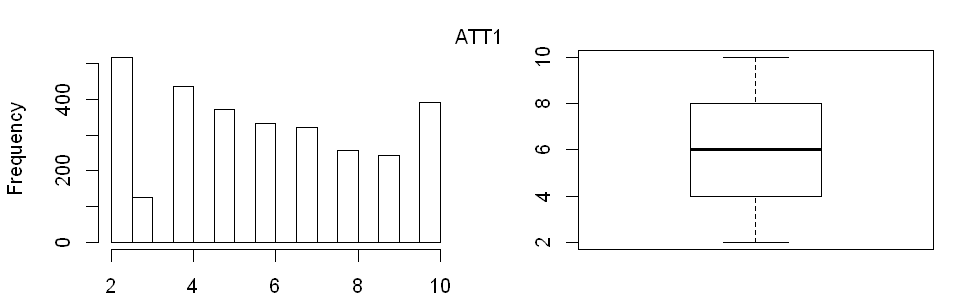

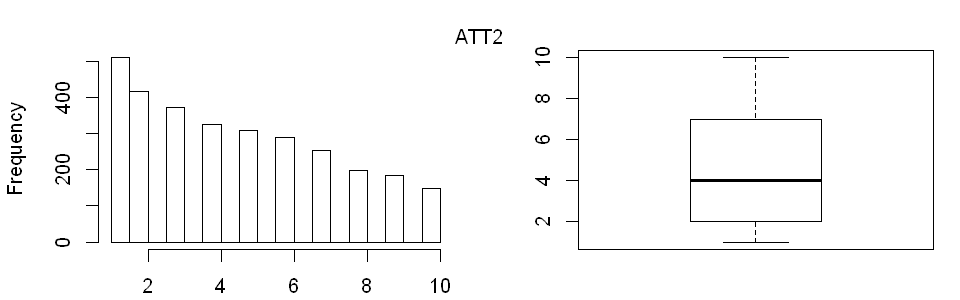

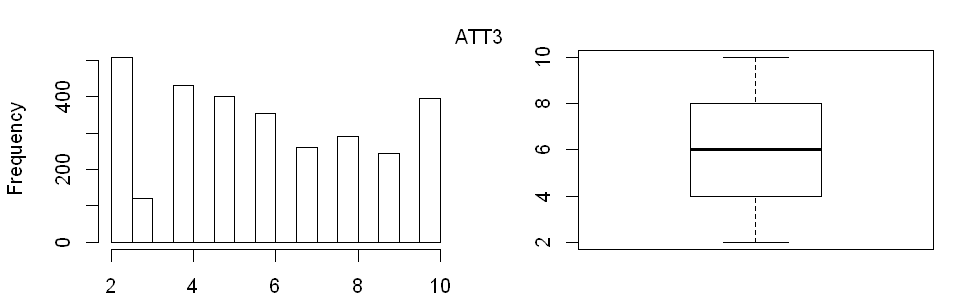

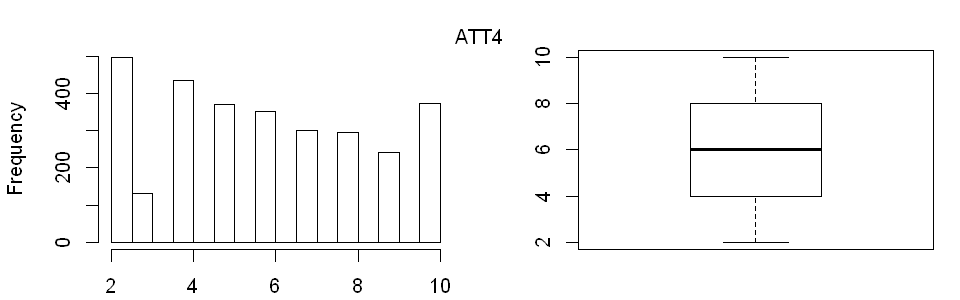

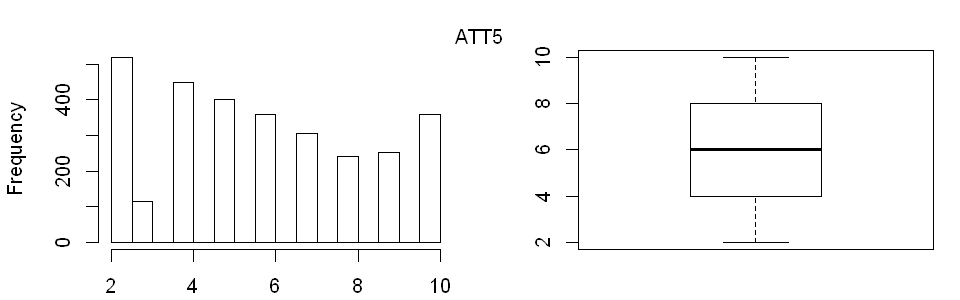

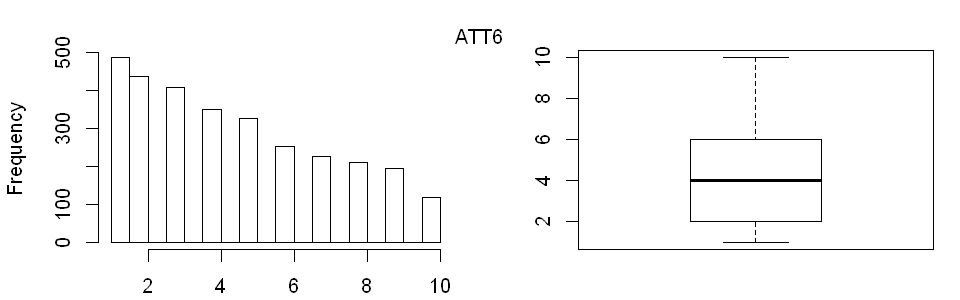

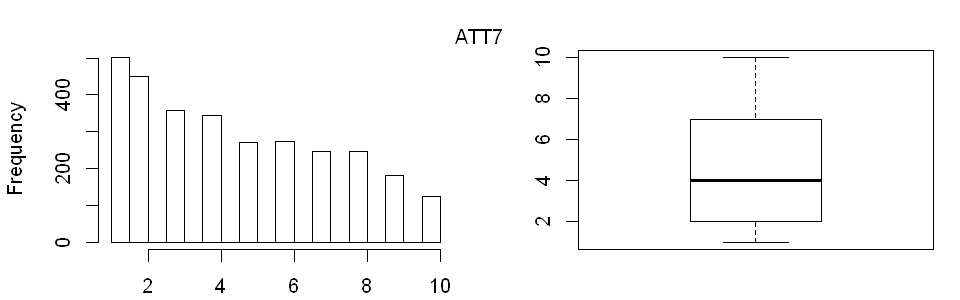

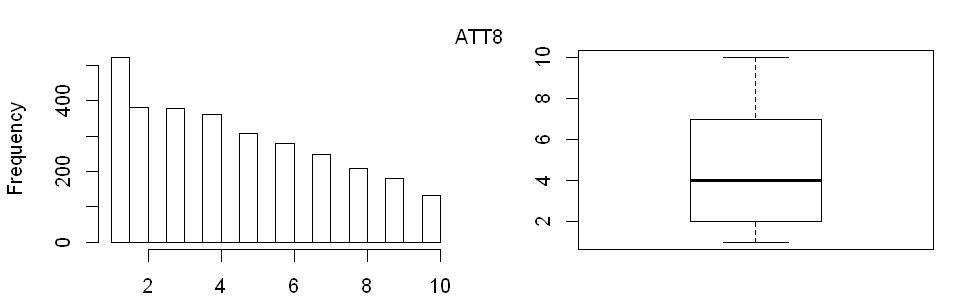

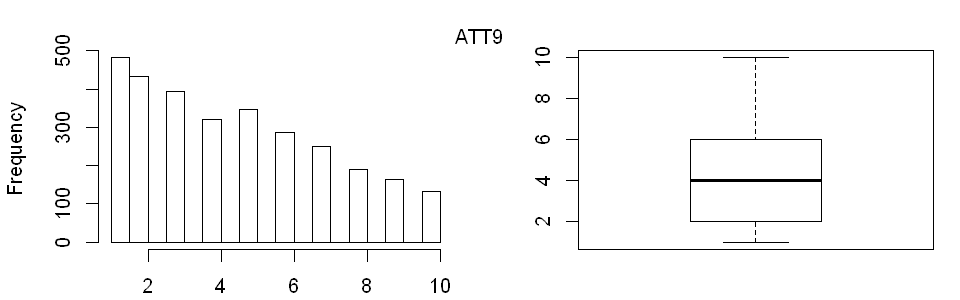

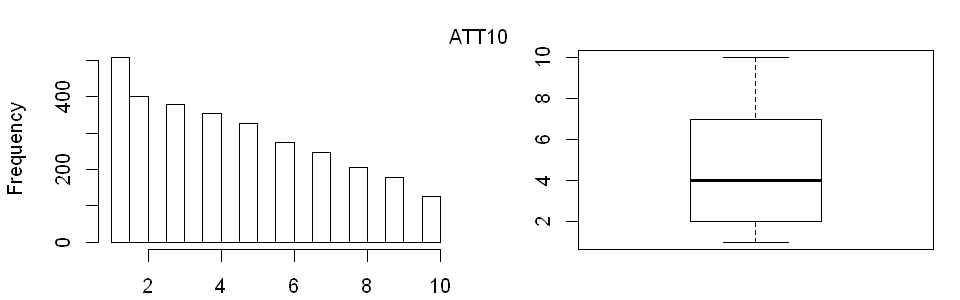

In [19]:
oldpar <- par() #this records all the default settings
par(mfrow=c(1,2)) # this makes to plots in one row
par(mar=c(2.1,4.1,2.1,1.1)) #BLTR
options(repr.plot.width=8, repr.plot.height=2.5)
for (i in names(prostate)) {
    if (i != "Result") {
        hist(prostate[[i]],xlab=NULL,main=NULL)
        boxplot(prostate[[i]])
        mtext(i,side=3,line=-2, outer=TRUE)
    }
}
suppressWarnings( par(oldpar)) # Restore settings

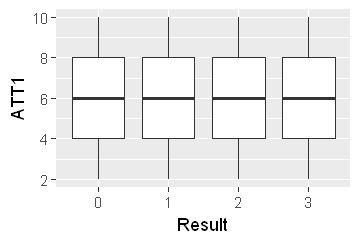

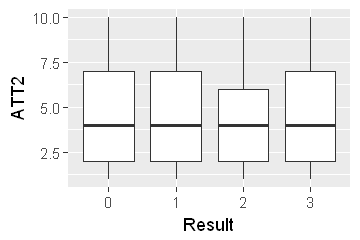

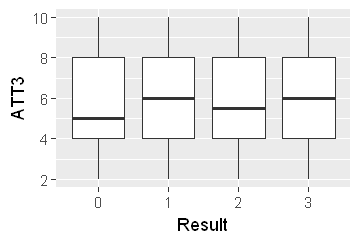

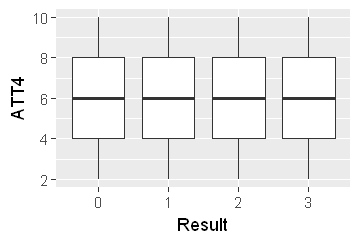

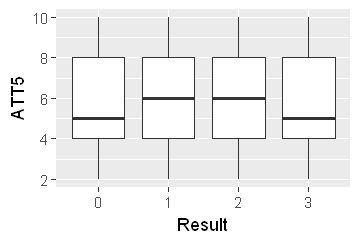

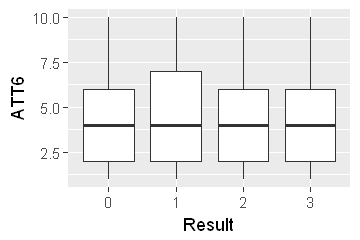

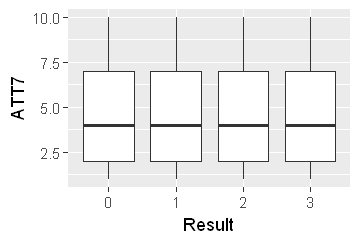

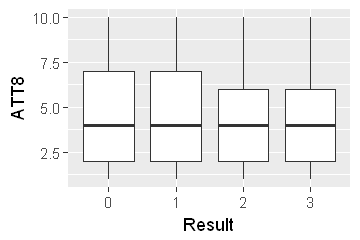

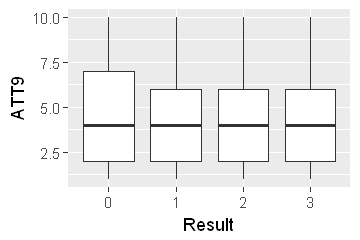

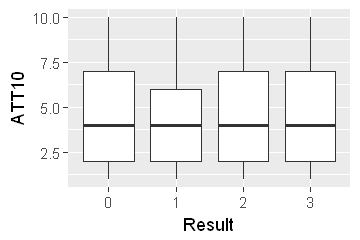

In [20]:
options(repr.plot.width = 3)
options(repr.plot.height = 2)
par(mfrow = c(2,2));
ggplot(prostate, aes(x = Result, y = ATT1)) + geom_boxplot()
ggplot(prostate, aes(x = Result, y = ATT2)) + geom_boxplot()
ggplot(prostate, aes(x = Result, y = ATT3)) + geom_boxplot()
ggplot(prostate, aes(x = Result, y = ATT4)) + geom_boxplot()
ggplot(prostate, aes(x = Result, y = ATT5)) + geom_boxplot()
ggplot(prostate, aes(x = Result, y = ATT6)) + geom_boxplot()
ggplot(prostate, aes(x = Result, y = ATT7)) + geom_boxplot()
ggplot(prostate, aes(x = Result, y = ATT8)) + geom_boxplot()
ggplot(prostate, aes(x = Result, y = ATT9)) + geom_boxplot()
ggplot(prostate, aes(x = Result, y = ATT10)) + geom_boxplot()
options(repr.plot.width = 6)
options(repr.plot.height = 4)

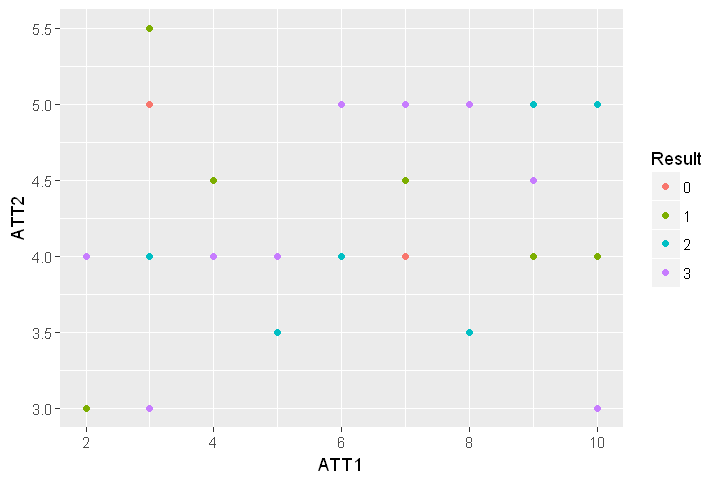

In [21]:
ggplot(aes(x=ATT1, y=ATT2, color=Result),  #by setting color=color, ggplot automatically draw in different colors
       data=prostate) + geom_point(stat='summary', fun.y=median)

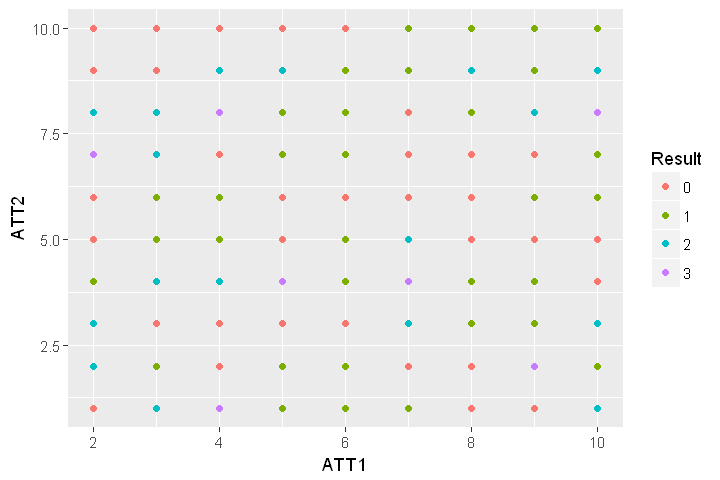

In [22]:
qplot(ATT1, ATT2, colour=Result, data=prostate)

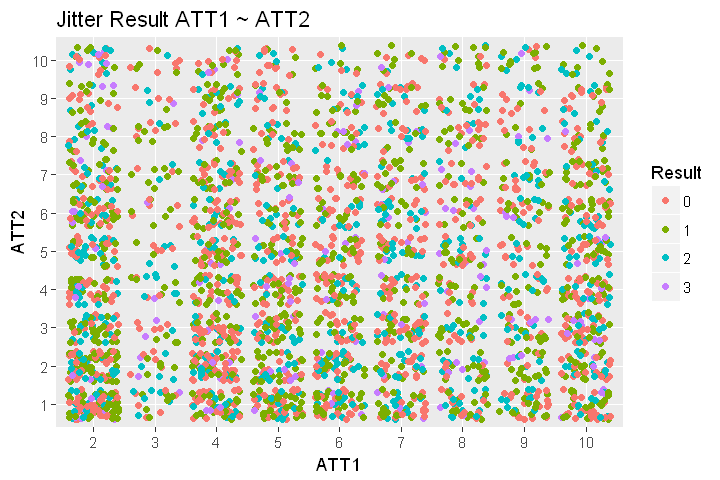

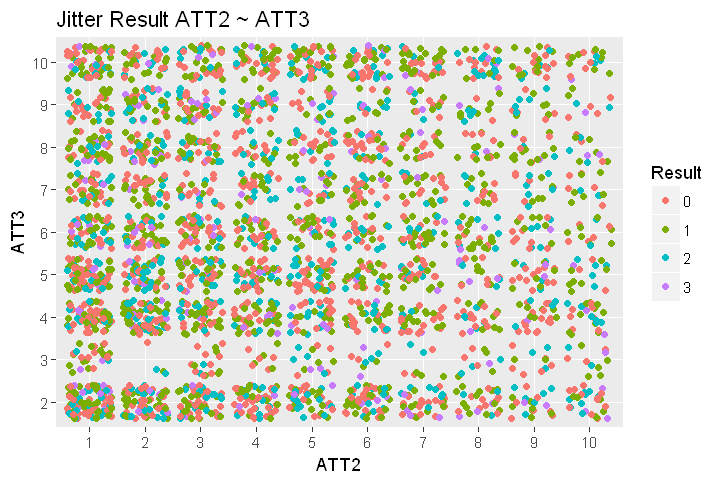

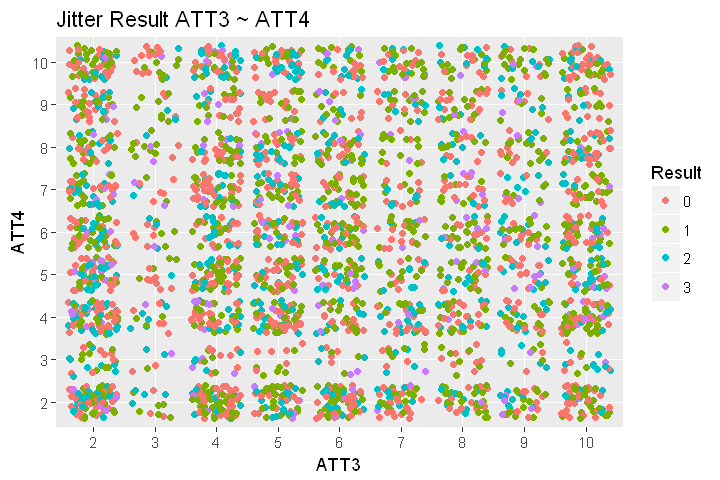

In [23]:
Udf.Utilities.Jitter(prostate,"ATT1","ATT2","Result")
Udf.Utilities.Jitter(prostate, "ATT2", "ATT3", "Result")
Udf.Utilities.Jitter(prostate, "ATT3", "ATT4", "Result")

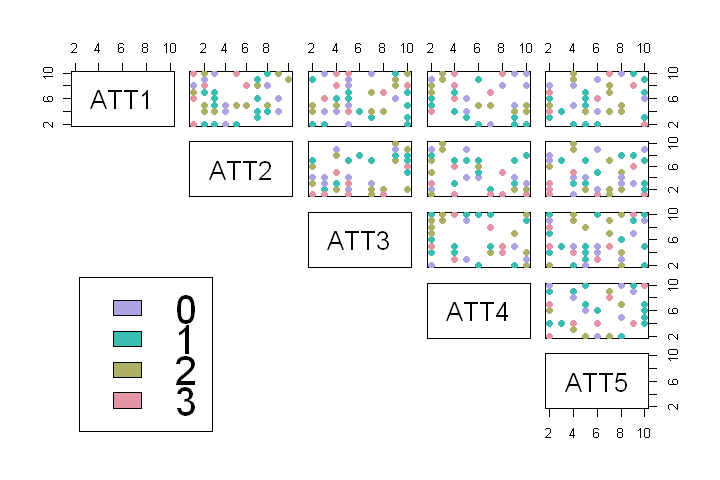

In [24]:
labels <- prostate[,11]
result_col <- rev(rainbow_hcl(4))[as.numeric(labels)]

# Plot a SPLOM:
# just show the first 50 records and the first 5 columns so we can visualise what is going on
pairs(prostate[1:50,1:5], col = result_col,
      lower.panel = NULL,
       cex.labels=2, pch=19, cex = 1.2)

# Add a legend
par(xpd = TRUE)
legend(x = 0.05, y = 0.4, cex = 2,
   legend = as.character(levels(labels)),
    fill = unique(result_col))
par(xpd = NA)

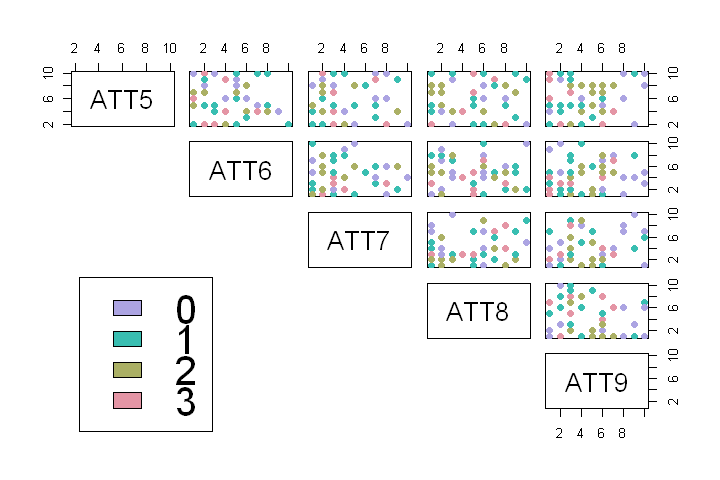

In [25]:
# now do the last 5 columns
pairs(prostate[1:50,5:9], col = result_col,
      lower.panel = NULL,
       cex.labels=2, pch=19, cex = 1.2)

# Add a legend
par(xpd = TRUE)
legend(x = 0.05, y = 0.4, cex = 2,
   legend = as.character(levels(labels)),
    fill = unique(result_col))
par(xpd = NA)

While Scatterplot matrices are not so good for looking at discrete variables - it still gives us an idea of how difficult this classification exercise will be

In [26]:
par(las = 1, mar = c(4.5, 3, 3, 2) + 0.1, cex = .8)
MASS::parcoord(prostate, col = result_col, var.label = TRUE, lwd = 2)

# Add Title
title("Parallel coordinates plot of the Result data")
# Add a legend
par(xpd = TRUE)
legend(x = 1.75, y = -.25, cex = 1,
   legend = as.character(levels(labels)),
    fill = unique(result_col), horiz = TRUE)

ERROR: Error in x - min(x, na.rm = TRUE): non-numeric argument to binary operator


In [ ]:
tableplot(prostate) # gives you the unsorted image below
tableplot(prostate, sortCol="Result") # gives you a sorted image according to class

In [ ]:
# Look for some near zero variance predictors from the original dataset.
nzv <- caret::nearZeroVar(prostate[,- c(1,ncol(prostate))],saveMetrics = TRUE)
nzv

We can see that we don't really have any zero variance predictors. Also all the features seem to have only about 30% unique data points out of the entire data set. The most frequent to the second most frequent value also seems to be spread across the feature space from around 1.2 to 1.1. <br />
This shows that the data is quite spread out. Unlikely that the features themselves would do anything.<br />

---
# 2. EDA Report

- No univariate outliers were identified using Tukey's test or the Hampel identifier.
- The bar graph of response variable 'Result' versus response class shows the distribution is unbalanced.
- All histograms have a general trend of decreasing frequency (count) per increase in the independent variable.
- 'ATT1' and 'ATT3' show the same boxplot across classes. This was also picked up in summary statistics. This suggests that these two predictors maybe non-informative.
- The correlation data shows there is little relationship between predictors as all off diagonal cells have strengths less than absolute 0.1.

### Train/Test split
Before we do anything, dedicate 20% of our data to an unseen Test set.

In [66]:
# 20% of the sample size
smp_size <- floor(0.8 * nrow(prostate))

set.seed(seed)
train_ind <- sample(seq_len(nrow(prostate)), size = smp_size)

train <- prostate[train_ind, ]
test <- prostate[-train_ind, ]

In [67]:
actual <-  as.numeric(test$Result)-1

In [68]:
actual_factor <- actual
actual_factor[actual_factor==0] <- "curable"
actual_factor[actual_factor==1] <- "tumour"
actual_factor[actual_factor==2] <- "node"
actual_factor[actual_factor==3] <- "incurable"

---
# 3. XGBoost

In [30]:
# create an upsample of training to obtain an even split of classes
# note that other sampling methods (down, SMOTE) were tried with less success
xg_train <- Udf.Utilities.UpSample(train)

xg_test <- test

In [31]:
# Check the proportions of each factor within the Result variable
w <- table(xg_train$Result)
w


  0   1   2   3 
876 876 876 876 

In [32]:
# set the target for XGBoost to a numeric range from 0 - 3
xg_train.y <- as.numeric(xg_train$Result)-1
xg_test.y <- as.numeric(test$Result)-1

In [33]:
# store the actuals for future comparison
#actual <- xg_test.y

In [34]:
# convert to matrix for boosting method
xg_train <- sparse.model.matrix(Result ~ ., data = xg_train)
dtrain <- xgb.DMatrix(data=xg_train, label=xg_train.y)

In [35]:
xg_test <- sparse.model.matrix(Result ~ ., data = xg_test)
dtest <- xgb.DMatrix(data=xg_test, label=xg_test.y)

In [36]:
watchlist <- list(xg_train=dtrain)

In [37]:
# set default params to be used if we don't have the compute power to perform this gridsearch
nrounds <- 500
max_depth <- 6
eta <- 0.1
colsample_bytree <- 0.9
subsample <- 0.9
gamma <- 0
min_child_weight <- 1

In [38]:
# cross validate to select optimal value for number of rounds
set.seed(seed)
n_rounds.cv <- 1000
params <- list(booster = "gbtree", objective = "multi:softmax",
               num_class = 4, eval_metric = 'merror',
               max_depth = max_depth, eta = eta,
               colsample_bytree = colsample_bytree, subsample = subsample, min_child_weight = min_child_weight)

In [39]:
bst.cv <- xgb.cv(params, dtrain, n_rounds.cv, nfold = 10, metrics = {'merror'},
                 print.every.n = 20, prediction = TRUE)

[0]	train-merror:0.508879+0.012468	test-merror:0.624680+0.024307
[20]	train-merror:0.176560+0.008523	test-merror:0.468025+0.029982
[40]	train-merror:0.100583+0.002541	test-merror:0.418943+0.031163
[60]	train-merror:0.061802+0.002610	test-merror:0.406106+0.027163
[80]	train-merror:0.036307+0.002331	test-merror:0.396708+0.024365
[100]	train-merror:0.021911+0.001830	test-merror:0.384998+0.024580
[120]	train-merror:0.013667+0.001957	test-merror:0.381288+0.025276
[140]	train-merror:0.007325+0.001342	test-merror:0.372162+0.028310
[160]	train-merror:0.004027+0.000748	test-merror:0.369870+0.031357
[180]	train-merror:0.002030+0.000477	test-merror:0.369019+0.029462
[200]	train-merror:0.001237+0.000484	test-merror:0.369307+0.028689
[220]	train-merror:0.000634+0.000473	test-merror:0.369020+0.025303
[240]	train-merror:0.000190+0.000401	test-merror:0.368169+0.024413
[260]	train-merror:0.000000+0.000000	test-merror:0.367882+0.024541
[280]	train-merror:0.000000+0.000000	test-merror:0.366731+0.021838
[

In [40]:
n_rounds.train <- which.min(bst.cv$dt[, test.merror.mean])
n_rounds.train

[1] 306

In [41]:
# create the model
bst <- xgb.train(   params              = params, 
                    data                = dtrain, 
                    nrounds             = n_rounds.train, 
                    verbose             = 1,
                    watchlist           = watchlist,
                    maximize            = FALSE
)

[0]	xg_train-merror:0.501712
[1]	xg_train-merror:0.408961
[2]	xg_train-merror:0.368721
[3]	xg_train-merror:0.327911
[4]	xg_train-merror:0.316210
[5]	xg_train-merror:0.291381
[6]	xg_train-merror:0.277397
[7]	xg_train-merror:0.275114
[8]	xg_train-merror:0.261986
[9]	xg_train-merror:0.261701
[10]	xg_train-merror:0.247717
[11]	xg_train-merror:0.235160
[12]	xg_train-merror:0.221747
[13]	xg_train-merror:0.216039
[14]	xg_train-merror:0.216039
[15]	xg_train-merror:0.209475
[16]	xg_train-merror:0.202340
[17]	xg_train-merror:0.196347
[18]	xg_train-merror:0.190354
[19]	xg_train-merror:0.185502
[20]	xg_train-merror:0.182078
[21]	xg_train-merror:0.177511
[22]	xg_train-merror:0.171518
[23]	xg_train-merror:0.164954
[24]	xg_train-merror:0.162671
[25]	xg_train-merror:0.152683
[26]	xg_train-merror:0.145263
[27]	xg_train-merror:0.143836
[28]	xg_train-merror:0.137557
[29]	xg_train-merror:0.133562
[30]	xg_train-merror:0.132135
[31]	xg_train-merror:0.129281
[32]	xg_train-merror:0.121861
[33]	xg_train-merror

In [42]:
# generate predictions from model
pred <- predict(bst, xg_test);

In [43]:
confusionMatrix(pred, actual)

Confusion Matrix and Statistics

          Reference
Prediction  0  1  2  3
         0 87 83 60 15
         1 82 78 60 18
         2 40 38 21  2
         3  5  5  6  0

Overall Statistics
                                        
               Accuracy : 0.31          
                 95% CI : (0.273, 0.349)
    No Information Rate : 0.357         
    P-Value [Acc > NIR] : 0.992882      
                                        
                  Kappa : -0.02         
 Mcnemar's Test P-Value : 0.000704      

Statistics by Class:

                     Class: 0 Class: 1 Class: 2 Class: 3
Sensitivity             0.407    0.382    0.143   0.0000
Specificity             0.591    0.596    0.823   0.9717
Pos Pred Value          0.355    0.328    0.208   0.0000
Neg Pred Value          0.642    0.652    0.747   0.9401
Prevalence              0.357    0.340    0.245   0.0583
Detection Rate          0.145    0.130    0.035   0.0000
Detection Prevalence    0.408    0.397    0.168   0.0267
Balan

In [44]:
feature.importance <- xgb.importance(dimnames(xg_train)[[2]], model = bst)
head(feature.importance)

,Feature,Gain,Cover,Frequence
1,ATT3,0.104013392229815,0.0884387812879234,0.100707140393239
2,ATT9,0.102409110367457,0.116503945866794,0.103535701966195
3,ATT4,0.102311142280264,0.0900530928434779,0.0998620213866851
4,ATT6,0.101093972495696,0.101818313112935,0.100793377026561
5,ATT10,0.100559832080534,0.106793830794048,0.100758882373232
6,ATT2,0.0995691186445694,0.10838137342493,0.100569161779924


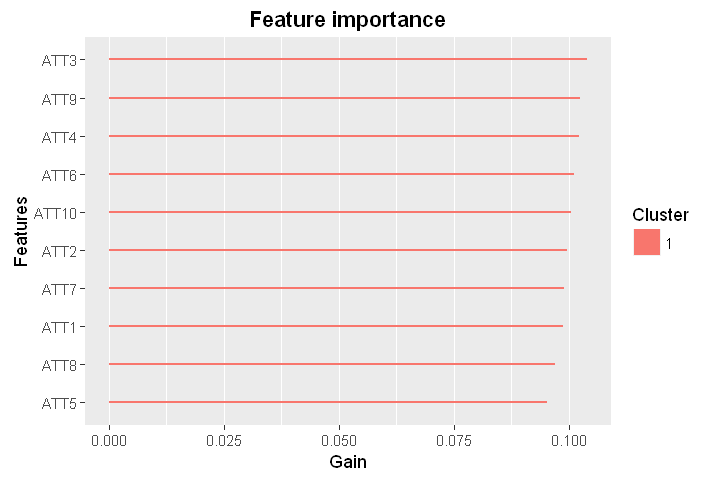

In [38]:
xgb.plot.importance(feature.importance)

## Cross Validate further parameters for XGBoost using GridSearch

In [39]:
xgbGrid <- expand.grid(
    nrounds = c(100, 300, 500, 1000),
    max_depth = c(1, 3, 5, 7),
    eta = c(0.001, 0.01, 0.1),
    gamma = c(0, 1),
    colsample_bytree = c(1, 0.9, 0.8),
    min_child_weight = c(1, 2, 3),
    subsample = c(1, 0.9, 0.8)
)

In [40]:
xgbTrControl <- trainControl(
    method = "repeatedcv",
    number = 5,
    repeats = 2,
    verboseIter = FALSE,
    returnData = FALSE,
    allowParallel = TRUE
)

In [41]:
xg_train <- Udf.Utilities.UpSample(train)
xg_train$Result <- as.numeric(xg_train$Result)-1
for(i in c(1:ncol(xg_train))) {
    xg_train[,i] <- as.numeric(xg_train[,i])
}

In [42]:
set.seed(seed)

# This is computationaly expensive - takes about an hour
"
xgbTrain <- train(
    x = as.matrix(xg_train[, ! names(xg_train) %in% c('Result')]), 
    y = xg_train$Result,
    objective = 'multi:softmax',
    trControl = xgbTrControl,
    tuneGrid = xgbGrid,
    method = 'xgbTree',
    num_class = 4,
    eval_metric = 'merror'
)
"

[1] "\nxgbTrain <- train(\n    x = as.matrix(xg_train[, ! names(xg_train) %in% c('Result')]), \n    y = xg_train$Result,\n    objective = 'multi:softmax',\n    trControl = xgbTrControl,\n    tuneGrid = xgbGrid,\n    method = 'xgbTree',\n    num_class = 4,\n    eval_metric = 'merror'\n)\n"

In [43]:
# get the top model and its results
#head(xgbTrain$results[with(xgbTrain$results, order(RMSE)), ], 5)

#    eta max_depth gamma colsample_bytree min_child_weight subsample nrounds   RMSE Rsquared  RMSESD RsquaredSD
#291 0.1         7     1              0.9                1       0.9    1000 0.8798   0.4809 0.06850    0.06617
#303 0.1         7     1              0.9                3       0.9    1000 0.8872   0.4755 0.05355    0.05192
#297 0.1         7     1              0.9                2       0.9    1000 0.8894   0.4725 0.05044    0.04991
#290 0.1         7     1              0.9                1       0.9     500 0.8931   0.4684 0.08039    0.07727
#308 0.1         7     1              1.0                1       0.9     500 0.8965   0.4639 0.09140    0.08873

#    eta max_depth gamma colsample_bytree min_child_weight subsample nrounds   RMSE Rsquared  RMSESD RsquaredSD
#91  0.10         8     0              0.9                1       0.9     500 0.8699   0.4890 0.06079    0.06009
#92  0.10         8     0              0.9                1       0.9    1000 0.8716   0.4888 0.03330    0.03463
#39  0.01         8     0              0.9                1       0.9    5000 0.8744   0.4849 0.07411    0.07273
#42  0.01         8     0              0.9                2       0.9    5000 0.8748   0.4857 0.06031    0.05941
#102 0.10         8     1              0.9                1       0.9    5000 0.8762   0.4858 0.03332    0.03191

In [88]:
nrounds <- 500
max_depth <- 7
eta <- 0.1
colsample_bytree <- 0.9
subsample <- 0.9
gamma <- 0
min_child_weight <- 1

In [89]:
# Alter the params based on the best performing set of params abvove
params <- list(booster = "gbtree", objective = "multi:softmax",
               num_class = 4, eval_metric = 'merror',
               max_depth = max_depth, eta = eta,
               colsample_bytree = colsample_bytree, subsample = subsample,
               gamma = gamma, min_child_weight = min_child_weight)

In [ ]:
bst.cv <- xgb.cv(params, dtrain, nrounds, nfold = 10, metrics = {'merror'},
                 print.every.n = 20, prediction = TRUE)

In [ ]:
n_rounds.train <- which.min(bst.cv$dt[, test.merror.mean])
n_rounds.train

In [ ]:
# create the model
bst <- xgb.train(   params              = params, 
                    data                = dtrain, 
                    nrounds             = n_rounds.train, 
                    verbose             = 1,
                    watchlist           = watchlist,
                    maximize            = FALSE
)

In [ ]:
# generate predictions from model
pred <- predict(bst, xg_test);

In [ ]:
confusionMatrix(pred, actual)

### Why/when to use Gradient Boosted Trees

We chose 

There are two main reasons why you would use Random Forests over Gradient Boosted Decision Trees, and they are both pretty related:

RF are much easier to tune than GBM
RF are harder to overfit than GBM
Related to (1), RF basically has only one hyperparameter to set: the number of features to randomly select at each node. However there is a rule-of-thumb to use the square root of the number of total features which works pretty well in most cases[1]. On the other hand, GBMs have several hyperparameters that include the number of trees, the depth (or number of leaves), and the shrinkage (or learning rate).

And, regarding (2), while it is not true that RF do not overfit (as opposed as many are led to believe by Breiman's strong assertions[2]), it is true that they are more robust to overfitting and require less tuning to avoid it.

In some sense, RF is a tree ensemble that is more "plug'n'play" than GBM. However, it is generally true that a well-tuned GBM can outperform a RF.

Also, as Tianqi Chen mentioned, RF has traditionally been easier to parallelism. However, that is not a good reason anymore given there are efficient ways to do it with GBMs also

Practically, in almost all the cases, if you have to choose one method. Boosted Trees (GBM) is usually be preferred than RF if you tune the parameter carefully.  

The major reason is in terms of training objective, Boosted Trees(GBM) tries to add new trees that compliments the already built ones.  This normally gives you better accuracy with less trees.

This being said, the ideas of subsampling and bagging in RF is important. They can readily be incorporated into boosted tree training. This will indeed help the performance usually.

There is a historical reason such that RF is easier to parallelize. This can also be done for boosted trees, though less trivial. Boosted Trees can be distributed and very fast.   We did it in dmlc/xgboost  and it works pretty well.

One last advantage of boosted trees are about modeling, because boosted trees are derived by optimizing a objective function, basically it can be used to solve almost all objective you can write gradient out. This including things like ranking, poission regression, which RF is harder to achieve. We have a tutorial describing this perspective Introduction to Boosted Trees


Algorithmic difference is; Random Forests are trained with random sample of data (even more randomized cases available like feature randomization) and it trusts randomization to have better generalization performance on out of train set.
On the other spectrum, Gradient Boosted Trees algorithm additionally tries to find optimal linear combination of trees (assume final model is the weighted sum of predictions of individual trees) in relation to given train data. This extra tuning might be deemed as the difference. Note that, there are many variations of those algorithms as well. 

At the practical side; owing to this tuning stage, Gradient Boosted Trees are more susceptible to jiggling data. This final stage makes GBT more likely to overfit therefore if the test cases are inclined to be so verbose compared to train cases this algorithm starts lacking. On the contrary, Random Forests are better to strain on overfitting although it is lacking on the other way around. 

So the best choice depends to the case your have as always.

Dimensiality - Boosted trees are the method of choice in low (< 100) dimension settings. Random forests are the better choice in high-dimension settings.

Ideally, at the end of the project we would like to be able to convey how the prediction model is working under the hood to doctors who use it. They will be able to bring domain expertise to the problem if they can see how the model is working. This is one benefit of using a Tree based model. This is reduced somewhat as we bring in aspects such as Boosting and Random Forests, however.

After using the method, we were unable to improve the predictive accuracy much beyond 34%. Much of this was due to not having the compute power to effectively tune the hyperparameters. Given we were very unsure about our data, we needed to tune heavily, especially since we were seeing many cases of train error rates much lower than test. Avoiding over-fitting proved to be the demise of this method.


# 4. Random Forest

Given that our EDA failed to show up any strong correlations between variables, we are a little unsure if there are any strong predictors (relatively) in the dataset. We need to ensure that our tree gives a fair consideration to all of the features to ensure we don't head towards a local minima. This is where the Random Forst approach will come in. The method takes random samples of predictors at each split and only one is chosen from this set. So we can have decisions where the most optimal/important feature is not included for consideration. 

In [72]:
# create an upsample of training to obtain an even split of classes
rforest_train <- train

In [73]:
# perform up-sampling using caret
control <- trainControl(method="repeatedcv", number=10, repeats=3, sampling = "up")
metric <- "Accuracy"
set.seed(seed)
tunegrid <- expand.grid(.mtry=c(2, 3, 4))
rf_default <- train(Result ~., data=rforest_train, method="rf", metric=metric, tuneGrid=tunegrid, trControl=control, ntree=1000)
print(rf_default)

Random Forest 

2400 samples
  10 predictor
   4 classes: '0', '1', '2', '3' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 2158, 2162, 2161, 2161, 2160, 2160, ... 
Addtional sampling using up-sampling

Resampling results across tuning parameters:

  mtry  Accuracy  Kappa    
  2     0.3410    -0.008345
  3     0.3397    -0.007036
  4     0.3367    -0.009191

Accuracy was used to select the optimal model using  the largest value.
The final value used for the model was mtry = 2. 


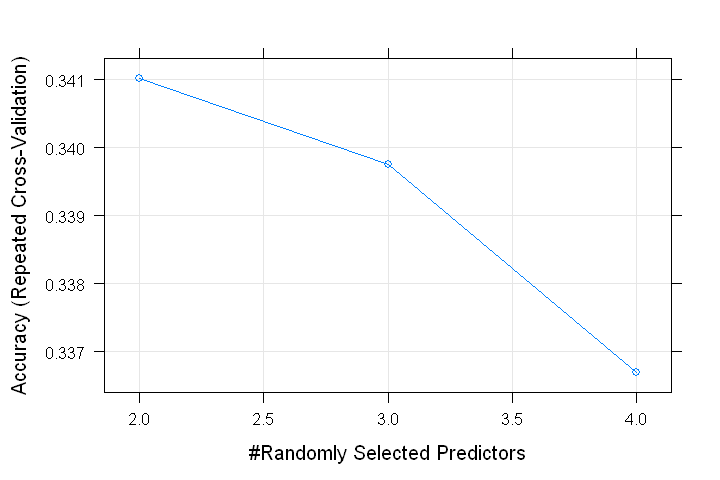

In [74]:
plot(rf_default)

In [75]:
pred_rf <- predict(rf_default, test)

In [76]:
confusionMatrix(pred_rf, actual)

Confusion Matrix and Statistics

          Reference
Prediction  0  1  2  3
         0 92 91 66 17
         1 95 89 66 17
         2 25 23 14  1
         3  2  1  1  0

Overall Statistics
                                          
               Accuracy : 0.325           
                 95% CI : (0.288, 0.364)  
    No Information Rate : 0.357           
    P-Value [Acc > NIR] : 0.953           
                                          
                  Kappa : -0.016          
 Mcnemar's Test P-Value : 0.00000000000358

Statistics by Class:

                     Class: 0 Class: 1 Class: 2 Class: 3
Sensitivity             0.430    0.436   0.0952  0.00000
Specificity             0.549    0.551   0.8918  0.99292
Pos Pred Value          0.346    0.333   0.2222  0.00000
Neg Pred Value          0.635    0.655   0.7523  0.94128
Prevalence              0.357    0.340   0.2450  0.05833
Detection Rate          0.153    0.148   0.0233  0.00000
Detection Prevalence    0.443    0.445   0.105

In [77]:
print(importance(rf_default$finalModel,type = 2))

      MeanDecreaseGini
ATT1             249.3
ATT2             266.5
ATT3             254.7
ATT4             257.4
ATT5             248.5
ATT6             261.7
ATT7             257.3
ATT8             260.3
ATT9             263.2
ATT10            259.2


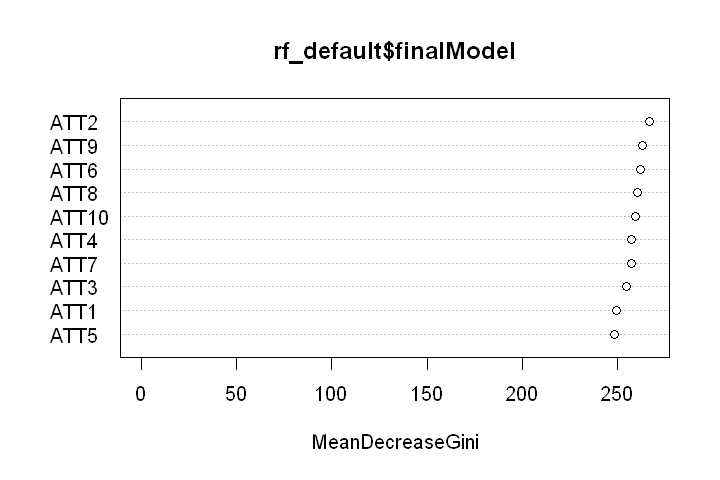

In [78]:
options(repr.plot.width = 6)
options(repr.plot.height = 4)
varImpPlot(rf_default$finalModel)

## Cross Validation for Random Forest feature selection 

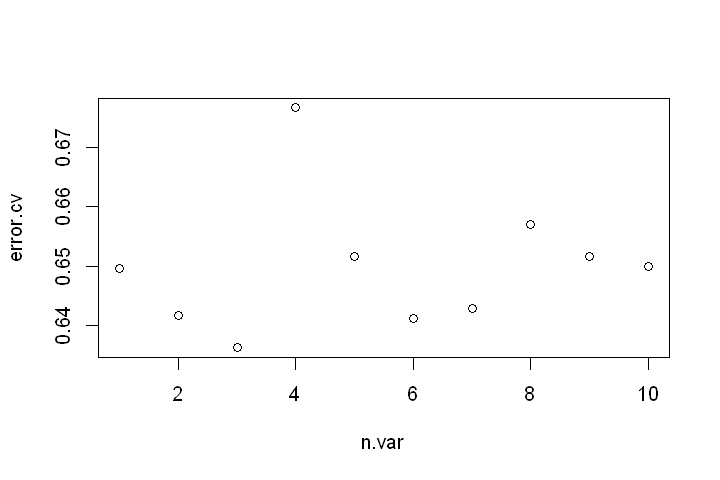

In [79]:
x <- train
x$Result <- NULL
y <- train$Result

rf.cv <- rfcv(x, y, cv.fold=10, step=0.9)

set.seed(seed)
with(rf.cv, plot(n.var, error.cv))

Ok, this is telling us that a model with all features may not be best. Let's try retrain the model without the lowest importance features and rerun the predictions

In [84]:
rforest <- randomForest(Result ~ . - ATT1 - ATT3 - ATT5, data = rforest_train, mtry=4, ntree=10000, sampsize=1000)
rforest


Call:
 randomForest(formula = Result ~ . - ATT1 - ATT3 - ATT5, data = rforest_train,      mtry = 4, ntree = 10000, sampsize = 1000) 
               Type of random forest: classification
                     Number of trees: 10000
No. of variables tried at each split: 4

        OOB estimate of  error rate: 63.04%
Confusion matrix:
    0   1  2 3 class.error
0 405 419 44 0      0.5334
1 386 446 44 0      0.4909
2 203 256 36 0      0.9273
3  72  81  8 0      1.0000

In [85]:
print(importance(rforest,type = 2))

      MeanDecreaseGini
ATT2            100.51
ATT4             94.28
ATT6             98.78
ATT7             94.06
ATT8            101.03
ATT9             97.79
ATT10           100.21


In [86]:
pred_rf <- predict(rforest, test)

In [87]:
confusionMatrix(pred_rf, actual)

Confusion Matrix and Statistics

          Reference
Prediction   0   1   2   3
         0  99  87  73  16
         1 102 100  67  19
         2  13  17   7   0
         3   0   0   0   0

Overall Statistics
                                        
               Accuracy : 0.343         
                 95% CI : (0.305, 0.383)
    No Information Rate : 0.357         
    P-Value [Acc > NIR] : 0.765         
                                        
                  Kappa : 0.002         
 Mcnemar's Test P-Value : NA            

Statistics by Class:

                     Class: 0 Class: 1 Class: 2 Class: 3
Sensitivity             0.463    0.490   0.0476   0.0000
Specificity             0.544    0.525   0.9338   1.0000
Pos Pred Value          0.360    0.347   0.1892      NaN
Neg Pred Value          0.646    0.667   0.7513   0.9417
Prevalence              0.357    0.340   0.2450   0.0583
Detection Rate          0.165    0.167   0.0117   0.0000
Detection Prevalence    0.458    0.480   0

# 5. Deep Learning

In [11]:
obj_ <- Udf.Utilities.PrepareTraining(prostate)
tr_ <- obj_$training
ts_ <- obj_$testing

In [ ]:
h2o.init(nthreads = -1)

In [ ]:
# What are these for?
tr_ <- read.csv("trFE.csv")
ts_ <- read.csv("tsFE.csv")
tr_$Result <- as.factor(tr_$Result)
ts_$Result <- as.factor(ts_$Result)

# 6. Turbo Boost

In [167]:
# Make training and test sets
#obj_ <- Udf.Utilities.PrepareTraining(prostate)
tr_ <- train#obj_$training
ts_ <- test#obj_$testing
actual <- ts_$Result

In [168]:
# PCA
pc_ <- Udf.Utilities.Prcomp(tr_[,-ncol(tr_)],nComps = 2)

pcObj_ <- pc_$prcompObj # Get object 

tr_ <- cbind(tr_,pc_$components) # bind to features.

In [169]:
# do the same to the test set
pc_ts <- Udf.Utilities.Prcomp(ts_[,-ncol(ts_)],nComps = 2)

pcObj_ts<- pc_ts$prcompObj # Get object 

ts_ <- cbind(ts_,pc_ts$components) # bind to features.

In [53]:
# Control method
ctrl_ <- trainControl(method = "cv", number = 5, sampling = "up")
mdl.xgb <- train(Result ~ . , data = tr_, method = "xgbTree", trControl = ctrl_)

In [173]:
pred_xgb_prcomp <- predict(mdl.xgb, ts_)

In [174]:
confusionMatrix(actual, pred_xgb_prcomp)

Confusion Matrix and Statistics

          Reference
Prediction  0  1  2  3
         0 80 74 45 15
         1 71 89 36  8
         2 50 61 26 10
         3 15 12  6  2

Overall Statistics
                                        
               Accuracy : 0.328         
                 95% CI : (0.291, 0.368)
    No Information Rate : 0.393         
    P-Value [Acc > NIR] : 1.000         
                                        
                  Kappa : 0.024         
 Mcnemar's Test P-Value : 0.199         

Statistics by Class:

                     Class: 0 Class: 1 Class: 2 Class: 3
Sensitivity             0.370    0.377   0.2301  0.05714
Specificity             0.651    0.684   0.7515  0.94159
Pos Pred Value          0.374    0.436   0.1769  0.05714
Neg Pred Value          0.648    0.629   0.8079  0.94159
Prevalence              0.360    0.393   0.1883  0.05833
Detection Rate          0.133    0.148   0.0433  0.00333
Detection Prevalence    0.357    0.340   0.2450  0.05833
Balan

In [60]:
mdl.gbm <- train(Result ~ . , data = tr_,method = "gbm", trControl = ctrl_)
pred_gbm <- predict(mdl.gbm, ts_)

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3863             nan     0.1000    0.0006
     2        1.3843             nan     0.1000   -0.0011
     3        1.3829             nan     0.1000    0.0010
     4        1.3814             nan     0.1000   -0.0004
     5        1.3799             nan     0.1000   -0.0001
     6        1.3785             nan     0.1000   -0.0004
     7        1.3773             nan     0.1000   -0.0002
     8        1.3760             nan     0.1000   -0.0009
     9        1.3748             nan     0.1000   -0.0001
    10        1.3739             nan     0.1000    0.0001
    20        1.3650             nan     0.1000   -0.0007
    40        1.3519             nan     0.1000   -0.0010
    60        1.3435             nan     0.1000   -0.0012
    80        1.3368             nan     0.1000   -0.0011
   100        1.3311             nan     0.1000   -0.0016
   120        1.3264             nan     0.1000   -0.0016
   140        

In [61]:
confusionMatrix(actual, pred_gbm)

Confusion Matrix and Statistics

          Reference
Prediction  0  1  2  3
         0 69 57 52 36
         1 62 55 57 30
         2 32 40 41 34
         3 16  6  4  9

Overall Statistics
                                        
               Accuracy : 0.29          
                 95% CI : (0.254, 0.328)
    No Information Rate : 0.298         
    P-Value [Acc > NIR] : 0.687         
                                        
                  Kappa : 0.028         
 Mcnemar's Test P-Value : 0.000000000398

Statistics by Class:

                     Class: 0 Class: 1 Class: 2 Class: 3
Sensitivity             0.385   0.3481   0.2662   0.0826
Specificity             0.656   0.6629   0.7623   0.9470
Pos Pred Value          0.322   0.2696   0.2789   0.2571
Neg Pred Value          0.715   0.7399   0.7506   0.8230
Prevalence              0.298   0.2633   0.2567   0.1817
Detection Rate          0.115   0.0917   0.0683   0.0150
Detection Prevalence    0.357   0.3400   0.2450   0.0583
Balan

---
# 7. KNN Classification

In [347]:
knn_train <- train

In [348]:
set.seed(seed)
ctrl <- trainControl(method="repeatedcv",repeats = 5)
knnFit <- train(Result ~ ., 
                data = knn_train, 
                method = "knn", 
                trControl = ctrl, 
                preProcess = c("center","scale"),
                tuneLength = 20)

In [349]:
knnFit

k-Nearest Neighbors 

2400 samples
  10 predictor
   4 classes: '0', '1', '2', '3' 

Pre-processing: centered (10), scaled (10) 
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 2158, 2162, 2161, 2161, 2160, 2160, ... 
Resampling results across tuning parameters:

  k   Accuracy  Kappa     
   5  0.3327     0.0031361
   7  0.3398     0.0052320
   9  0.3456     0.0067162
  11  0.3454    -0.0001731
  13  0.3512     0.0059354
  15  0.3529     0.0050043
  17  0.3526     0.0021470
  19  0.3519    -0.0011296
  21  0.3497    -0.0065015
  23  0.3519    -0.0044468
  25  0.3467    -0.0140404
  27  0.3473    -0.0147368
  29  0.3413    -0.0244012
  31  0.3466    -0.0170929
  33  0.3448    -0.0208928
  35  0.3495    -0.0144542
  37  0.3500    -0.0144856
  39  0.3491    -0.0164655
  41  0.3541    -0.0095169
  43  0.3521    -0.0132306

Accuracy was used to select the optimal model using  the largest value.
The final value used for the model was k = 41. 

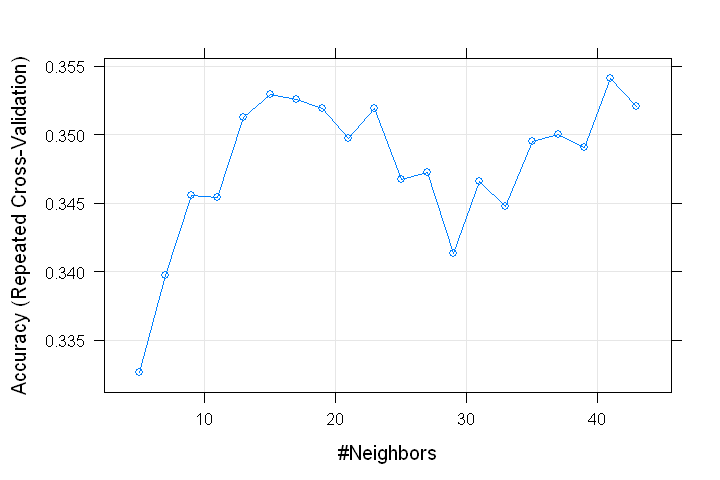

In [350]:
#Plotting yields Number of Neighbours Vs accuracy (based on repeated cross validation)
plot(knnFit)

In [351]:
pred_knn <- predict(knnFit,newdata = test )

In [352]:
confusionMatrix(actual, pred_knn )

Confusion Matrix and Statistics

          Reference
Prediction   0   1   2   3
         0 101 109   4   0
         1  91 110   3   0
         2  77  66   4   0
         3  21  13   1   0

Overall Statistics
                                             
               Accuracy : 0.358              
                 95% CI : (0.32, 0.398)      
    No Information Rate : 0.497              
    P-Value [Acc > NIR] : 1                  
                                             
                  Kappa : 0.019              
 Mcnemar's Test P-Value : <0.0000000000000002

Statistics by Class:

                     Class: 0 Class: 1 Class: 2 Class: 3
Sensitivity             0.348    0.369  0.33333       NA
Specificity             0.635    0.689  0.75680   0.9417
Pos Pred Value          0.472    0.539  0.02721       NA
Neg Pred Value          0.510    0.525  0.98234       NA
Prevalence              0.483    0.497  0.02000   0.0000
Detection Rate          0.168    0.183  0.00667   0.0000
De

---
# 8. Support Vector Machine
(Peter Tadich)

In [83]:
prostateDatasetTrain_modified <- train
prostateDatasetTest_modified<- test

#### Response variable to factor.

In [84]:
# Encode response 'Result' as a factor variable to perform classification.
prostateDatasetTrain_modified[['Result']] <- as.factor(prostateDatasetTrain_modified[['Result']]);
# Do the same for the test set.
prostateDatasetTest_modified[['Result']] <- as.factor(prostateDatasetTest_modified[['Result']]);

#### Predictor matrix

In [85]:
# All predictors to a matrix.
x <- data.matrix(subset(prostateDatasetTrain_modified, select = -c(Result)));

In [86]:
x[1:5,];

,ATT1,ATT2,ATT3,ATT4,ATT5,ATT6,ATT7,ATT8,ATT9,ATT10
863,5,8,10,9,2,2,8,6,2,3
2365,4,4,2,4,4,1,3,7,3,9
1227,7,4,9,2,4,2,3,9,9,8
2647,5,5,7,2,4,1,8,10,1,7
2818,10,1,2,5,7,2,8,5,9,5


In [87]:
# Do the same for the test set.
x_test <- data.matrix(subset(prostateDatasetTest_modified, select = -c(Result)));

In [88]:
x_test[1:5,];

,ATT1,ATT2,ATT3,ATT4,ATT5,ATT6,ATT7,ATT8,ATT9,ATT10
1,2,4,2,6,5,7,1,2,6,8
11,10,3,7,9,9,5,2,3,2,6
12,8,2,4,2,2,2,4,8,6,10
13,7,2,10,7,10,1,3,6,2,1
14,9,10,9,3,4,6,9,6,4,2


#### Response vector

In [89]:
# Response vector.
y <- prostateDatasetTrain_modified[['Result']];

In [90]:
# Do the same for the test set.
y_test <- prostateDatasetTest_modified[['Result']];

#### Dealing with class imbalance

In [91]:
# Down-sampling.
#xy <- downSample(x, y, list = FALSE, yname = 'Result');

# Up-sampling.
xy <- upSample(x, y, list = FALSE, yname = 'Result');

In [92]:
# The classes are now balanced.
table(xy$Result);


  0   1   2   3 
876 876 876 876 

In [93]:
# Randomize the classes as the classes are now blocks. First class takes rows 1 to n, second class n+1 to m etc...
indices <- sample(1:dim(xy)[1], dim(xy)[1], replace=FALSE);
if(length(unique(indices)) != dim(xy)[1]){
    cat('Warning: non-unique indices created.');
}

In [94]:
xy <- data.frame(xy)[indices, ];
rownames(xy) <- NULL;
head(xy, 5);

,ATT1,ATT2,ATT3,ATT4,ATT5,ATT6,ATT7,ATT8,ATT9,ATT10,Result
1,7,3,5,4,10,7,3,3,3,1,1
2,4,6,5,7,4,7,2,6,3,3,2
3,5,2,4,4,5,5,3,6,4,8,0
4,5,1,10,8,3,6,4,9,5,4,0
5,10,4,2,5,8,1,6,4,4,1,2


In [95]:
cat('Number of samples: ', dim(xy)[1]);

Number of samples:  3504

#### Create predictor matrix, response vector

In [96]:
# Predictor matrix - all predictors to a matrix.
x <- data.matrix(subset(xy, select = -c(Result)));

In [97]:
# Response vector.
y <- xy[['Result']];

#### Setup dataframe for recursive feature elimination

In [98]:
# Create the 'predictor' vectors.
predictors <- subset(xy, select = -c(Result)); # Drop 'Result'

In [99]:
# Create the 'response' vector.
response <- xy$Result;

In [100]:
# Combine the 'response' with the 'predictors'.
adData <- predictors;
adData$Result <- response;

### SVM setup

In [101]:
# Create a split vector to be used to create a training set and a test set.
set.seed(658);
split <- createDataPartition(response, p = .8, list = FALSE);

# Now create 'training' and 'test' datasets.
training <- adData[ split, ];
testing  <- adData[-split, ];

# Get the 'predictor' names.
predVars <- names(adData)[!(names(adData) %in% c("Result"))];

# Create the cross-validation files as a list to use with different functions.
set.seed(294);
index <- createMultiFolds(training$Result, times = 5);

## The candidate set of the number of predictors to evaluate
varSeq <- seq(9,length(predVars),1);

In [102]:
rank <- function (object, x, y) 
{
    cat('rank\n')
    cat('Model type: ', object$modelType, '\n')
    vimp <- varImp(object, scale = FALSE)$importance
    cat('vimp colnames: ', colnames(vimp), '\n')
    cat('levels (before): ', levels(y), '\n')
    # Rename by name: change "0" to "X0"
    levels(y)[levels(y)=="0"] <- "X0"
    levels(y)[levels(y)=="1"] <- "X1"
    levels(y)[levels(y)=="2"] <- "X2"
    levels(y)[levels(y)=="3"] <- "X3"
    cat('levels (after): ', levels(y), '\n')
    if (object$modelType == "Regression") {
        vimp <- vimp[order(vimp[, 1], decreasing = TRUE), , drop = FALSE]
    }
    else {
        if (all(levels(y) %in% colnames(vimp))) {
            avImp <- apply(vimp[, levels(y), drop = TRUE], 1, 
                mean)
            vimp$Overall <- avImp
        }
    }
    vimp$var <- rownames(vimp)
    cat(dim(vimp), '\n')
    vimp
}

In [103]:
selectSize <- function (x, metric, maximize) 
    {
        cat('selectSize\n')
        cat(dim(x), '\n')
        cat(names(x), '\n')
        cat(metric, '\n');
        best <- if (maximize) 
            which.max(x[, metric])
        else which.min(x[, metric])
        cat('Optimal number of predictors: ', min(x[best, "Variables"]), '\n')
        min(x[best, "Variables"])
    }

In [104]:
selectVar <- function (y, size) 
{
    cat('selectVar:\n')
    cat(dim(y), '\n')
    cat(names(y), '\n')
    cat('size: ', size, '\n')
    finalImp <- ddply(y[, c("Overall", "var")], .(var), function(x) mean(x$Overall, 
        na.rm = TRUE))
    names(finalImp)[2] <- "Overall"
    finalImp <- finalImp[order(finalImp$Overall, decreasing = TRUE), ]
    as.character(finalImp$var[1:size])
}

In [105]:
ctrl <- rfeControl(method = "repeatedcv",
    repeats = 5,
    saveDetails = TRUE,
    index = index,
    returnResamp = "final",
    verbose = TRUE,
    allowParallel = TRUE);

# 'caretFuncs' list allows for a model to be tuned at each iteration of feature seleciton.
ctrl$functions <- caretFuncs;
# These summary functions are used to evaluate the models.
ctrl$functions$summary <- multiClassSummary;

In [106]:
ctrl$functions$rank <- rank;
ctrl$functions$selectSize <- selectSize;
ctrl$functions$selectVar <- selectVar;
# IMPORTANT: To list the 'functions' execute 'ctrl$functions'.
#ctrl$functions;

In [107]:
# Run model tuning sequentially.
cvCtrl <- trainControl(method = "repeatedcv",
    verboseIter = FALSE,
    classProbs = FALSE,
    allowParallel = TRUE,
    summaryFunction = multiClassSummary);

In [108]:
# Setup tuning parameters.
set.seed(201);
SVM_MODEL = 'svmPoly';
if(SVM_MODEL == 'svmRadial'){ # svmRadial
    sigmaRangeFull <- sigest(array(unlist(training), dim = dim(training)));
    svmRGridFull <- expand.grid(sigma = as.vector(sigmaRangeFull)[1], C = 2^(-3:3));
} else { # svmPoly
    #svmRGridFull <- expand.grid(scale = 2^(-1:1), degree = c(3), C = 2^(-3:3));
    svmRGridFull <- expand.grid(scale = c(1.0, 10.0, 100.0), degree = 1, C = c(0.03125, 0.0625, 0.125));
}

In [ ]:
# Run recursive feature elimination to do feature selection on svm model. 
if(TRUE){

    # Do parallel computation.
    cores <- 4;
    registerDoParallel(cores=cores); # Parallel computation.

    ### Do search - start.
    # Recursive feature elimiation.
    set.seed(321);
    svmRFE <- rfe(
        training[, predVars], # predictor variables
        training$Result, # response variable
        sizes = varSeq,
        metric = 'Accuracy',
        rfeControl = ctrl,
        method = 'svmPoly', # Or 'svmRadial' (but must change 'tuneGrid').
        #tuneGrid = svmRGridFull,
        tuneGrid = expand.grid(scale = c(10.0), degree = 1, C = c(0.0625)), # NOTE: degree = 1
        preProc = c('center', 'scale'),
        fit = TRUE,
        trControl = cvCtrl);
    ### Do search - end.

    # Shut down parallel computation.
    stopImplicitCluster();
    
}

In [84]:
# Variable names that were picked in the final model.
namesPicked <- predictors(svmRFE);
namesPicked;

# Order of importance:
# 'ATT4' 'ATT9' 'ATT3' 'ATT10' 'ATT2' 'ATT1' 'ATT6' 'ATT7' 'ATT5' 'ATT8'

[1] "ATT9"  "ATT10" "ATT6"  "ATT3"  "ATT1"  "ATT2"  "ATT7"  "ATT4"  "ATT8" 
[10] "ATT5"

In [85]:
svmRFE;


Recursive feature selection

Outer resampling method: Cross-Validated (10 fold, repeated 5 times) 

Resampling performance over subset size:

 Variables Accuracy   Kappa Mean_Sensitivity Mean_Specificity
         9    0.255 0.00717            0.255            0.752
        10    0.260 0.01372            0.260            0.753
 Mean_Pos_Pred_Value Mean_Neg_Pred_Value Mean_Detection_Rate
               0.256               0.752              0.0638
               0.262               0.753              0.0651
 Mean_Balanced_Accuracy AccuracySD KappaSD Mean_SensitivitySD
                  0.504     0.0235  0.0314             0.0235
                  0.507     0.0269  0.0358             0.0269
 Mean_SpecificitySD Mean_Pos_Pred_ValueSD Mean_Neg_Pred_ValueSD
            0.00784                0.0234               0.00847
            0.00895                0.0282               0.00929
 Mean_Detection_RateSD Mean_Balanced_AccuracySD Selected
               0.00589                   0.0157      

In [124]:
pred_svm <- predict(svmRFE, prostateDatasetTest_modified[, predVars])

In [125]:
confusionMatrix(actual, pred_svm)

Confusion Matrix and Statistics

          Reference
Prediction  0  1  2  3
         0 44 42 47 81
         1 51 46 52 55
         2 35 39 29 44
         3  6  8  7 14

Overall Statistics
                                             
               Accuracy : 0.222              
                 95% CI : (0.189, 0.257)     
    No Information Rate : 0.323              
    P-Value [Acc > NIR] : 1                  
                                             
                  Kappa : -0.013             
 Mcnemar's Test P-Value : <0.0000000000000002

Statistics by Class:

                     Class: 0 Class: 1 Class: 2 Class: 3
Sensitivity            0.3235   0.3407   0.2148   0.0722
Specificity            0.6336   0.6602   0.7462   0.9483
Pos Pred Value         0.2056   0.2255   0.1973   0.4000
Neg Pred Value         0.7617   0.7753   0.7660   0.6814
Prevalence             0.2267   0.2250   0.2250   0.3233
Detection Rate         0.0733   0.0767   0.0483   0.0233
Detection Prevalence  

In [86]:
# Create the confusion matrix - test dataset.
#table(predict(svmRFE, prostateDatasetTest_modified[, predVars]), prostateDatasetTest_modified$Result);

#     0  1  2  3
#  0 61 61 44  9
#  1 20 18 22  6
#  2 59 52 27  8
#  3 74 73 54 12

   
     0  1  2  3
  0 44 51 35  6
  1 42 46 39  8
  2 47 52 29  7
  3 81 55 44 14

In [87]:
#classError(table(predict(svmRFE, prostateDatasetTest_modified[, predVars]), prostateDatasetTest_modified$Result));

# Correctly  classified observations:  118 
# Total observations:  600 
# Accuracy:  0.1966667 
# Classification error:  0.8033333 

ERROR: Error in eval(expr, envir, enclos): could not find function "classError"


#### SVM model fit

In [126]:
# Get the 'predictor' names. Keep 'ATT8' 'ATT5' 'ATT9' 'ATT2' 'ATT3' 'ATT1' 'ATT7' 'ATT10' 'ATT4'.
namesPicked <- c("Result", 'ATT3', 'ATT8', 'ATT5');
predVarsSelected <- names(adData)[!(names(adData) %in% namesPicked)];
predVarsSelected;

[1] "ATT1"  "ATT2"  "ATT4"  "ATT6"  "ATT7"  "ATT9"  "ATT10"

In [127]:
# Tune svm model.
if(FALSE) {

    # Do parallel computation.
    cores <- 2;
    registerDoParallel(cores=cores); # Parallel computation.
    
    set.seed(321);
    svmFit <- train(
        training[, predVarsSelected], # predictor variables
        training$Result, # response variable
        metric = 'Accuracy',
        method = 'svmPoly', # Or 'svmRadial' (but must change 'tuneGrid').
        #tuneGrid = svmRGridFull,
        tuneGrid = expand.grid(scale = c(10.0), degree = 3, C = c(0.0625)),
        preProc = c('center', 'scale'),
        fit = TRUE,
        trControl = cvCtrl);
    
    # Shut down parallel computation.
    stopImplicitCluster();
    
}

In [130]:
svmFit;

Support Vector Machines with Polynomial Kernel 

2804 samples
   7 predictor
   4 classes: 'curable', 'tumour', 'node', 'incurable' 

Pre-processing: centered (7), scaled (7) 
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 2524, 2524, 2524, 2523, 2524, 2524, ... 
Resampling results:

  Accuracy  Kappa   Mean_Sensitivity  Mean_Specificity  Mean_Pos_Pred_Value
  0.3673    0.1564  0.3673            0.7891            0.3582             
  Mean_Neg_Pred_Value  Mean_Detection_Rate  Mean_Balanced_Accuracy
  0.7911               0.09183              0.5782                

Tuning parameter 'degree' was held constant at a value of 3
Tuning
 parameter 'scale' was held constant at a value of 10
Tuning parameter 'C'
 was held constant at a value of 0.0625
 

In [131]:
# IMPORTANT: example of how to use 'rank' function.
#ctrl$functions$rank(svmFit, x, y);

ERROR: Error in eval(expr, envir, enclos): attempt to apply non-function


In [132]:
#table(predict(svmFit, prostateDatasetTest_modified[, predVarsSelected]), prostateDatasetTest_modified$Result);

#      0   1   2   3
#  0  98 108  51  16
#  1  62  60  33   7
#  2  45  35  24  11
#  3  19  19   9   4

           
             0  1  2  3
  curable   75 50 41 11
  tumour    40 58 42  7
  node      48 42 31  7
  incurable 51 54 33 10

In [133]:
pred_svm <- predict(svmFit, prostateDatasetTest_modified[, predVarsSelected])

In [137]:
levels(pred_svm)

[1] "curable"   "tumour"    "node"      "incurable"

In [97]:
#classError(table(predict(svmFit, prostateDatasetTest_modified[, predVarsSelected]), prostateDatasetTest_modified$Result));

# Correctly  classified observations:  186 
# Total observations:  601 
# Accuracy:  0.3094842 
# Classification error:  0.6905158 

In [153]:
confusionMatrix(actual_factor, pred_svm)

Warning message in confusionMatrix.default(actual_factor, pred_svm):
"Levels are not in the same order for reference and data. Refactoring data to match."

Confusion Matrix and Statistics

           Reference
Prediction  curable tumour node incurable
  curable        75     40   48        51
  tumour         50     58   42        54
  node           41     42   31        33
  incurable      11      7    7        10

Overall Statistics
                                             
               Accuracy : 0.29               
                 95% CI : (0.254, 0.328)     
    No Information Rate : 0.295              
    P-Value [Acc > NIR] : 0.621              
                                             
                  Kappa : 0.047              
 Mcnemar's Test P-Value : 0.00000000000000271

Statistics by Class:

                     Class: curable Class: tumour Class: node Class: incurable
Sensitivity                   0.424        0.3946      0.2422           0.0676
Specificity                   0.671        0.6777      0.7542           0.9447
Pos Pred Value                0.350        0.2843      0.2109           0.2857
Neg Pred 

---
# 9. Classification Trees
(Peter Tadich)

In [98]:
# Create a classification tree using package 'C50'.
if(TRUE){

    set.seed(1);
    treeFit <- C5.0(Result ~., data = training); # From 'C50' package.
    
}

In [99]:
summary(treeFit);
treeFit;


Call:
C5.0.formula(formula = Result ~ ., data = training)


C5.0 [Release 2.07 GPL Edition]  	Sat Dec 03 12:01:14 2016
-------------------------------

Class specified by attribute `outcome'

Read 2804 cases (11 attributes) from undefined.data

Decision tree:

ATT9 <= 2:
:...ATT7 > 8:
:   :...ATT3 > 9:
:   :   :...ATT7 <= 9: 2 (8)
:   :   :   ATT7 > 9: 3 (3)
:   :   ATT3 <= 9:
:   :   :...ATT8 <= 1: 1 (9/4)
:   :       ATT8 > 1:
:   :       :...ATT8 > 8:
:   :           :...ATT3 <= 6: 0 (5)
:   :           :   ATT3 > 6: 1 (2)
:   :           ATT8 <= 8:
:   :           :...ATT1 <= 6:
:   :               :...ATT10 > 4:
:   :               :   :...ATT3 <= 8: 0 (11/1)
:   :               :   :   ATT3 > 8: 2 (2)
:   :               :   ATT10 <= 4:
:   :               :   :...ATT9 > 1: 1 (6)
:   :               :       ATT9 <= 1:
:   :               :       :...ATT1 <= 3: 0 (2/1)
:   :               :           ATT1 > 3: 2 (4/1)
:   :               ATT1 > 6:
:   :               :...ATT10 <=


Call:
C5.0.formula(formula = Result ~ ., data = training)

Classification Tree
Number of samples: 2804 
Number of predictors: 10 

Tree size: 537 

Non-standard options: attempt to group attributes


In [100]:
# Predict.
pred_tree <- predict(treeFit, prostateDatasetTest_modified);

In [101]:
table(predict = pred_tree, truth = prostateDatasetTest_modified[['Result']]);

#        truth
# predict  0  1  2  3
#       0 64 75 41 16
#       1 65 68 54 10
#       2 60 44 38  2
#       3 25 17 14  7

       truth
predict  0  1  2  3
      0 70 54 50  5
      1 66 77 45 13
      2 50 56 35 10
      3 28 17 17  7

In [102]:
confusionMatrix(actual, pred_tree)

Confusion Matrix and Statistics

          Reference
Prediction  0  1  2  3
         0 70 66 50 28
         1 54 77 56 17
         2 50 45 35 17
         3  5 13 10  7

Overall Statistics
                                        
               Accuracy : 0.315         
                 95% CI : (0.278, 0.354)
    No Information Rate : 0.335         
    P-Value [Acc > NIR] : 0.86039       
                                        
                  Kappa : 0.037         
 Mcnemar's Test P-Value : 0.00201       

Statistics by Class:

                     Class: 0 Class: 1 Class: 2 Class: 3
Sensitivity             0.391    0.383   0.2318   0.1014
Specificity             0.658    0.682   0.7506   0.9473
Pos Pred Value          0.327    0.377   0.2381   0.2000
Neg Pred Value          0.718    0.687   0.7439   0.8903
Prevalence              0.298    0.335   0.2517   0.1150
Detection Rate          0.117    0.128   0.0583   0.0117
Detection Prevalence    0.357    0.340   0.2450   0.0583
Balan

In [103]:
#classError(table(predict = treePredict, truth = prostateDatasetTest_modified[['Result']]));

# Correctly  classified observations:  177 
# Total observations:  600 
# Accuracy:  0.295 
# Classification error:  0.705 

# 10. Rule-based Models
(Peter Tadich)

In [104]:
# Create a rule-based model using package 'C50'.
if(TRUE){
    
    set.seed(1);
    rulesFit <- C5.0(Result ~., data = training, rules = TRUE); # From 'C50' package.
    
}

In [105]:
summary(rulesFit);
rulesFit;


Call:
C5.0.formula(formula = Result ~ ., data = training, rules = TRUE)


C5.0 [Release 2.07 GPL Edition]  	Sat Dec 03 12:02:01 2016
-------------------------------

Class specified by attribute `outcome'

Read 2804 cases (11 attributes) from undefined.data

Rules:

Rule 1: (8, lift 3.6)
	ATT1 > 3
	ATT2 > 6
	ATT2 <= 9
	ATT3 <= 5
	ATT5 <= 5
	ATT9 > 2
	ATT9 <= 3
	->  class 0  [0.900]

Rule 2: (8, lift 3.6)
	ATT2 <= 5
	ATT3 <= 7
	ATT4 > 9
	ATT6 > 3
	ATT7 <= 4
	ATT9 > 5
	->  class 0  [0.900]

Rule 3: (8, lift 3.6)
	ATT2 > 3
	ATT2 <= 5
	ATT3 <= 4
	ATT7 > 7
	ATT9 > 4
	->  class 0  [0.900]

Rule 4: (7, lift 3.6)
	ATT2 <= 2
	ATT3 <= 6
	ATT7 <= 8
	ATT8 <= 4
	ATT9 <= 2
	ATT10 > 2
	ATT10 <= 3
	->  class 0  [0.889]

Rule 5: (7, lift 3.6)
	ATT2 > 2
	ATT2 <= 6
	ATT3 <= 6
	ATT4 > 2
	ATT4 <= 8
	ATT5 <= 5
	ATT7 > 1
	ATT7 <= 2
	ATT8 <= 5
	ATT10 <= 5
	->  class 0  [0.889]

Rule 6: (7, lift 3.6)
	ATT1 <= 5
	ATT3 > 6
	ATT7 <= 8
	ATT9 <= 2
	ATT10 > 8
	->  class 0  [0.889]

Rule 7: (7, lift 3.6)
	ATT3 > 6
	


Call:
C5.0.formula(formula = Result ~ ., data = training, rules = TRUE)

Rule-Based Model
Number of samples: 2804 
Number of predictors: 10 

Number of Rules: 275 

Non-standard options: attempt to group attributes


In [106]:
# Predict.
pred_rules <- predict(rulesFit, prostateDatasetTest_modified);

In [107]:
table(predict = pred_rules, truth = prostateDatasetTest_modified[['Result']]);

#        truth
# predict  0  1  2  3
#       0 67 75 46 16
#       1 68 65 51  8
#       2 52 46 33  5
#       3 27 18 17  6

       truth
predict  0  1  2  3
      0 68 53 47  9
      1 77 84 57 17
      2 39 44 24  3
      3 30 23 19  6

In [108]:
confusionMatrix(actual, pred_rules)

Confusion Matrix and Statistics

          Reference
Prediction  0  1  2  3
         0 68 77 39 30
         1 53 84 44 23
         2 47 57 24 19
         3  9 17  3  6

Overall Statistics
                                        
               Accuracy : 0.303         
                 95% CI : (0.267, 0.342)
    No Information Rate : 0.392         
    P-Value [Acc > NIR] : 1             
                                        
                  Kappa : 0.018         
 Mcnemar's Test P-Value : 0.000029      

Statistics by Class:

                     Class: 0 Class: 1 Class: 2 Class: 3
Sensitivity             0.384    0.357    0.218   0.0769
Specificity             0.655    0.671    0.749   0.9444
Pos Pred Value          0.318    0.412    0.163   0.1714
Neg Pred Value          0.718    0.619    0.810   0.8726
Prevalence              0.295    0.392    0.183   0.1300
Detection Rate          0.113    0.140    0.040   0.0100
Detection Prevalence    0.357    0.340    0.245   0.0583
Balan

In [83]:
#classError(table(predict = rulesPredict, truth = prostateDatasetTest_modified[['Result']]));

# Correctly  classified observations:  171 
# Total observations:  600 
# Accuracy:  0.285 
# Classification error:  0.715 

---
# 11. Flexible Discriminant Analysis
(Peter Tadich)

In [80]:
levels(training$Result)[levels(training$Result)=="0"] <- "curable"
levels(training$Result)[levels(training$Result)=="1"] <- "tumour"
levels(training$Result)[levels(training$Result)=="2"] <- "node"
levels(training$Result)[levels(training$Result)=="3"] <- "incurable"

In [81]:
# Test 'fda' via 'mda' package with method = earth.
# Create a flexible discriminant model ('caret' uses 'earth' package hence method = earth).
if(TRUE){
    
    fdaFit <- fda(Result ~., data = prostateDatasetTrain_modified, method = earth, pmethod = 'none'); # From 'mda' package.
    
}

ERROR: Error in is.data.frame(data): object 'prostateDatasetTrain_modified' not found


In [82]:
# LGOCV 'leave-group-out cross- validation' or 'Monte Carlo cross-validation.'
ctrl <- trainControl(method = "LGOCV",
    summaryFunction = multiClassSummary,
    classProbs = TRUE,
    index = index,
    allowParallel = TRUE,
    savePredictions = TRUE);

ERROR: Error in trainControl(method = "LGOCV", summaryFunction = multiClassSummary, : object 'index' not found


In [115]:
# Train Flexible Discriminant Model.

# Note: get the following warning if nprune = 2
#       Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
#       "There were missing values in resampled performance measures."

if(TRUE){

    # Do parallel computation.
    cores <- 4;
    registerDoParallel(cores=cores); # Parallel computation.

    set.seed(476);
    fdaFit <- train(
        #x = x, # predictor variables
        #y = y, # response variable,
        x = training[, predVars], # predictor variables
        y = training$Result, # response variable,
        method = 'fda',
        pmethod = 'none',
        metric = 'Accuracy',
        tuneGrid = expand.grid(degree = c(1,2,3), nprune = 3:11),
        preProc = c('center', 'scale'),
        trControl = ctrl);

    # Shut down parallel computation.
    stopImplicitCluster();

}

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

In [116]:
fdaFit;

Flexible Discriminant Analysis 

2804 samples
  10 predictor
   4 classes: 'curable', 'tumour', 'node', 'incurable' 

Pre-processing: centered (10), scaled (10) 
Resampling: Repeated Train/Test Splits Estimated (50 reps, 75%) 
Summary of sample sizes: 2523, 2523, 2523, 2524, 2524, 2524, ... 
Resampling results across tuning parameters:

  degree  nprune  logLoss  Mean_ROC  Accuracy  Kappa    Mean_Sensitivity
  1        3      1.384    0.5178    0.2665    0.02200  0.2665          
  1        4      1.384    0.5245    0.2650    0.02008  0.2651          
  1        5      1.381    0.5347    0.2752    0.03358  0.2752          
  1        6      1.383    0.5293    0.2757    0.03425  0.2757          
  1        7      1.386    0.5264    0.2759    0.03452  0.2759          
  1        8      1.387    0.5242    0.2725    0.02998  0.2725          
  1        9      1.389    0.5233    0.2735    0.03140  0.2735          
  1       10      1.390    0.5231    0.2728    0.03044  0.2728          
  1 

In [119]:
# Predict.
pred_fda <- predict(fdaFit, prostateDatasetTest_modified);

In [120]:
table(predict = pred_fda, truth = prostateDatasetTest_modified[['Result']]);

#            truth
# predict      0  1  2  3
#   curable   62 71 42  8
#   tumour    34 12 19  2
#   node      44 69 36  9
#   incurable 74 52 50 16

           truth
predict       0   1   2   3
  curable    16  10   5   1
  tumour     40  45  34   9
  node       55  57  36   8
  incurable 103  92  72  17

In [79]:
confusionMatrix(actual_factor, pred_fda)

ERROR: Error in is.factor(reference): object 'pred_fda' not found


In [123]:
#classError(table(predict = fdaPredict, truth = prostateDatasetTest_modified[['Result']]));

# Correctly  classified observations:  126 
# Total observations:  600 
# Accuracy:  0.21 
# Classification error:  0.79 

# 12. Deep Learning
(Aruna Tillekeratne)

This notebook is the documentation which covers the implementation of a feedforward deep architecture nerual network to classify prostate cancer. 

## Neural Networks & Deep Learning
Neural Networks are machine learning models which have become increasingly popular in recent days for modelling complex systems. The idea behind neural nets can be somewhat traced back to the architecture of the brain, however arguably there are a large number of dissimilarities. Essentially neural networks are a number of models (nodes) layed out on computation graph form and each of the inputs are fed successively to each of these nodes (also called neurons). Indepth explanation of networks is beyond the scope of this document. If you are not familiar with neural networks, see https://en.wikipedia.org/wiki/Artificial_neural_network. Note this is a feed forward implemntation only. <br />
Deep learning is a recent (popularised recently) architectural scheme for neural networks. The computation nodes discussed above are generally arranged in layers. As apposed to shallow architecture, deep architecture involves having multiple layers before reaching the output of the network. You can learn more about deep learning at https://en.wikipedia.org/wiki/Deep_learning.

## Prostate Cancer Data 
The prostate cancer dataset is a 3000 observation dataset containing 4 level classification of prostate cancers. The entire dataset is numeric (with the response variable being a 4 level factor). The features are all measurements rounded to the nearest integer. See the exploratory data analysis for more information on this.

## How this notebook works.
Given that this is a deep learning notebook, it is unlikely that you want to go through the trainng phase. The training phase takes some time to run (depending on hardware ofcourse). None the less all the training code is available in the notebook. In the cell below, the variable named **isRetrainAllowed** is set to FALSE. If you would like to retrain, please set this variable to TRUE. Since networks are sensitive to initialisation, you may return different results to what has been trainied before.

### Deep Learning Model Architecture
We will be using the **h2o** library for the development of our deep learning models. This is a special environment which allows multi threaded learning for neural networks. This means that all models are of class h2o. When you want to test it on your validation set, you will not be able to simply call the **base::predict** function. 
We have defined a **predict.deep(dataset)** method for your use with the dataset. You may ask, why ? There are three reasons.

1. First the h2o library calls a special h2o.predict function which can talk to objects of type h2o. Our model will inherit from this class. <br />
2. The featureset needs to inherit from class h2o as well, so that some parallel processing may occur. <br />
3. This model takes engineered features, that is, the orignal features get transformed prior to being fed into the predictive model. <br />

### Libraries You Need To Run (Among other things)
This deep learning model has been trained in h2o Version 3.10.0.10. All models are saved from this version. For some reason, h2o has no backward compatibility. I'm serious, NO means absolutely nothing. So you need to install h2o version 3.10.0.10 even just to load the saved models. <br />
You also need the **deepModel.h2o** file to be in the folder of the notebook. This actually contains our neural network model. When you run the predict.deep(dataset) method, it'll make a call to load this file into memory and it'll pass your dataset into the model to make predictions. We will discuss in further detail inside the predict.deep method how it all works. <b4 />
The r script file **utilities.r** and **fe.r** are both required. These contain some utility and feature engineering functions which help transform or develop some new features using simple rules. 

In [45]:
## Set this to true if you want to retrain the deep learning model.
isRetrainAllowed <- FALSE
if(isRetrainAllowed){
    print("Warning: Model will retrain.")
} else{
    print("Skipping model training and loading existing model.")
}

[1] "Skipping model training and loading existing model."


In [46]:
source("utilities.r") # Utility functions and helpers.
source("FE.r") # Feature engineering functions.

## Feature Engineering

Bulk of the work for the deep learning model has happend in the feature engineering section. As discussed in the exploratory data analysis, the dataset is extremely non linear. The priniciple component analysis showed that that random scattering of variables with no distinct groups. This is probably a good sign that there will need to be some transformations done on the data and added as features. In order to keep simplicity, all the feature engineering happens in a pipeline. This is done for 2 reasons. Our predict.deep function can mimic our feature engineering and take the users dataset and do the trasnformation in function and also it makes the trasnformations much easier to follow. 

In [69]:
training <- train
testing <- test

### Step 1 :: Centering & Scaling 
Generally speaking, most algorithms, especially neural networks like 0 centered and scaled data. Why ? I don't know.
To do this we are going to use a method called preProcess from the caret package. This is actually a robust method to apply center and scaling using the training set and apply the same scaling matrix to any unseen data. We will also input a YeoJohnson transformation as well.

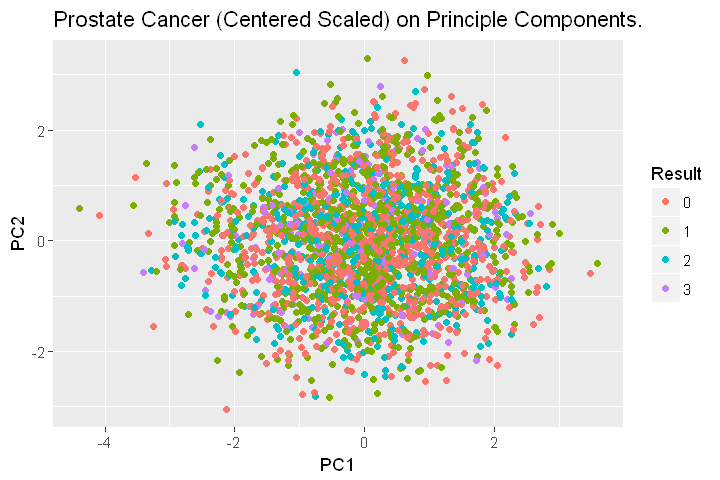

In [48]:
# Get the pre processor.
fe.PreProcessor <- caret::preProcess(training,method = c("center","scale","YeoJohnson"))

# We don't actually use this preprocessor in our predict.deep method but this show's you how the code works.
# Use the preprocessor to transform the training and the test dataset. This preprocessor model will be used to transform all unseen data as well.
tr.csyj <- predict(fe.PreProcessor,training) # training set.
ts.csyj <- predict(fe.PreProcessor,testing) # testing set.

# Let's visualise the dataset using smoe principle component analysis to get the two major axis. We will again call on a wrapper from the utilities script to do the principle component analysis for us. Inside the Udf.Utilities.Prcomp method is a simple call to stats::prcomp method. 
ggplot(Udf.Utilities.Prcomp(tr.csyj[,-ncol(tr.csyj)],nComps = 2)$components,aes(PC1,PC2,color = tr.csyj$Result)) + geom_point() + scale_color_discrete("Result") + ggtitle("Prostate Cancer (Centered Scaled) on Principle Components.")

We can see that there are no really distinct cluster groups. This is probably not a good indicator of predictability, there is absolutetly no visibility of class separation at all. There is also somewhat scattering to the outside as well, let's try using a spatial sign transform to project it radially outwards to see if we can improve the performance of the PCA.

### Step 2 :: Spatial Sign Transform
Spatial sign transforms are usually used to target outliers. But in this case, I just tried it randomly while I was frustrated about model performance, so voila. 

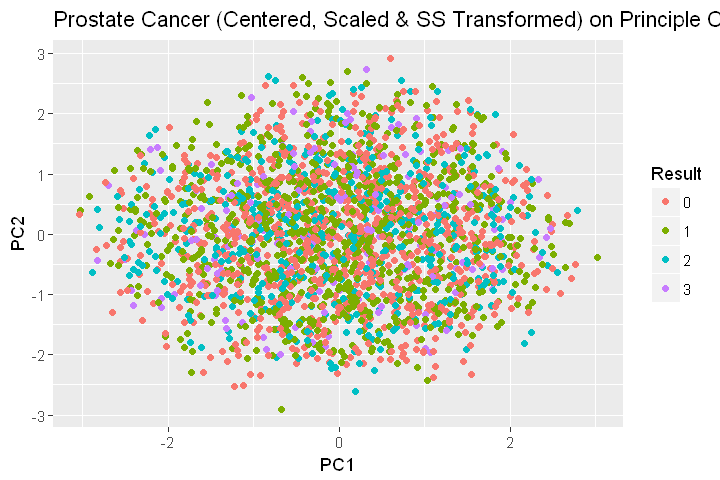

In [49]:
tr.csyj.ss <- as.data.frame(caret::spatialSign(tr.csyj[,-ncol(tr.csyj)]))
ts.csyj.ss <- as.data.frame(caret::spatialSign(ts.csyj[,-ncol(ts.csyj)]))

# Let's revisualise to see if the PCA has improved.
ggplot(Udf.Utilities.Prcomp(tr.csyj.ss,nComps = 2)$components,aes(PC1,PC2,color = tr.csyj$Result)) + geom_point() + scale_color_discrete("Result") + ggtitle("Prostate Cancer (Centered, Scaled & SS Transformed) on Principle Components")


Well, there isn't much improvement, but the data is less spread out, which is exactly what spatial sign does. 
We are going to use regularisation in our neural network, so it should automatically scale the parameters which are insiginificant down or to zero. Therefore we will bind any additonal transformations to the centered and scaled data. Let's call these binding objects as feed(s). So feed.training and feed.testing. We will hold out the label until we are at the final stage.
And yes, this is not the same as subsetting features (especially in these nonlinear models) but with the time constraint and the relatively poor computational power i have to make this model, my search grid couldn't be too big.

In [50]:
# Original data centered and scaled with a YeaJohnson transform.
feed.training <- tr.csyj[,-ncol(tr.csyj)]
feed.testing <- ts.csyj[,-ncol(tr.csyj)]  

# Bind the new data and redo column names
feed.training <- cbind(feed.training,tr.csyj.ss)
colnames(feed.training) <- paste("FT",1:ncol(feed.training),sep="")

feed.testing <- cbind(feed.testing,ts.csyj.ss)
colnames(feed.testing) <- paste("FT",1:ncol(feed.testing),sep="")

### Step 3 :: Adding the PCA Results
So far we have just been using PCA to visualise the data set. But let's include the soem of the results from the PCA as extra features. This may give it some more of the description of featurespace from the linear model of PCA.

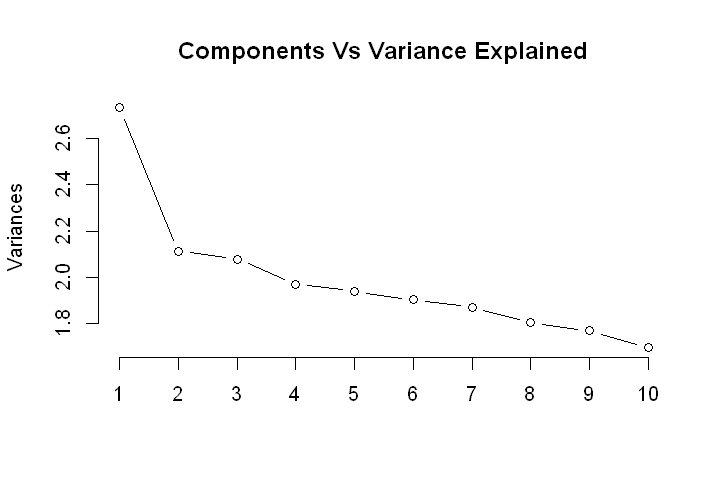

In [51]:
pcaModel_ <- Udf.Utilities.Prcomp(feed.training,nComp = ncol(feed.training))
# Look at the components and their explanation of the overall variance in the dataset.
plot(pcaModel_$prcompObj,"Components Vs Variance Explained",type = "l")

Looks like there is no 1 component which explains most of the variance. Remember our model is going to have l1 regularisation therefore it'll just simply scale the weights down to zero where variables don't actually help. So lets add the entire thing. <br />
It is important that we keep the same rotation that we learned from our training set over to the validation sets. So let's extract the rotation matrix and then multiply our validation set to get the rotated values. <br />

multiply the rotation by the matrix which is spatial sign transformed to get the next step.


In [52]:
tr.csyj.ss.pca <- pcaModel_$prcompObj$rotation * feed.training # matrix multiply the weights into the features.
feed.training <- cbind(feed.training,tr.csyj.ss.pca) # Bind the existing data.
colnames(feed.training) <- paste("FT",1:ncol(feed.training),sep="") # Generalise feature names.

ts.csyj.ss.pca <- pcaModel_$prcompObj$rotation * feed.testing
feed.testing <- cbind(feed.testing,ts.csyj.ss.pca)
colnames(feed.testing) <- paste("FT",1:ncol(feed.testing),sep="")

### Step 4 :: Row Sum of Top 2 PCA
Another useful feature may be able to be captured by the top principle components. We will use the top 2 here. This was also added because I did some random testing and found this actually helped the mean accuracy go up. 

In [53]:
tr.csyj.ss.pca.sum <- rowSums((pcaModel_$prcompObj$rotation * tr.csyj.ss.pca)[,1:2])
feed.training <- cbind(feed.training,tr.csyj.ss.pca.sum)
colnames(feed.training) <- paste("FT",1:ncol(feed.training),sep="")

ts.csyj.ss.pca.sum <- rowSums((pcaModel_$prcompObj$rotation * ts.csyj.ss.pca)[,1:2])
feed.testing <- cbind(feed.testing,ts.csyj.ss.pca.sum)
colnames(feed.testing) <- paste("FT",1:ncol(feed.testing),sep="")

### Step 5 :: Frequency Values of Features
Another useful feature is the number of counts of some of the variables and how the occur on the dataset. Given that everything is rounded to an integer, we can assume they are nearly categorical. Lets see how we do with this. We are calling on one of our utility functions, which essentiall does a count and joins it using the sqldf library.

In [54]:
tr.colsum <- my.f2cnt(training,"ATT1","ATT2")
feed.training <- cbind(feed.training,tr.colsum)
colnames(feed.training) <- paste("FT",1:ncol(feed.training),sep="")

ts.colsum <- my.f2cnt(testing,"ATT1","ATT2")
feed.testing <- cbind(feed.testing,ts.colsum)
colnames(feed.testing) <- paste("FT",1:ncol(feed.testing),sep="")

Warning message:
"Quoted identifiers should have class SQL, use DBI::SQL() if the caller performs the quoting."

### Step 6 :: Scale and Center Everything
Once again, scale and center everything so that the NN gets nice values between 1 and -1.

In [55]:
feed.training <- scale(feed.training)
feed.testing <- scale(feed.testing)
# Rebind the labels.
feed.training <- as.data.frame(cbind(feed.training,training[,"Result"]))
colnames(feed.training)[ncol(feed.training)] <- "Result"
feed.training[,"Result"] <- as.factor(feed.training[,"Result"])
feed.testing <- as.data.frame(cbind(feed.testing,testing[,"Result"]))
colnames(feed.testing)[ncol(feed.testing)] <- "Result"
feed.testing[,"Result"] <- as.factor(feed.testing[,"Result"])

### Autoencoder.
Autoencoders are a non supervised learning implementation of neural networks. We are going to be using it as a non linear implementation of PCA. That is, reducing dimensionality of the dataset non linearly. We will use the reduced set of outputs as features to our NN supervised model.


H2O is not running yet, starting it now...

Note:  In case of errors look at the following log files:
    C:\Users\jmills\AppData\Local\Temp\Rtmp2j84Ls/h2o_jmills_started_from_r.out
    C:\Users\jmills\AppData\Local\Temp\Rtmp2j84Ls/h2o_jmills_started_from_r.err


Starting H2O JVM and connecting: . Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         3 seconds 922 milliseconds 
    H2O cluster version:        3.10.0.8 
    H2O cluster version age:    1 month and 23 days  
    H2O cluster name:           H2O_started_from_R_jmills_uem511 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   1.75 GB 
    H2O cluster total cores:    4 
    H2O cluster allowed cores:  4 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    R Version:                  R version 3.3.1 (2016-06-21) 

  |==================================================

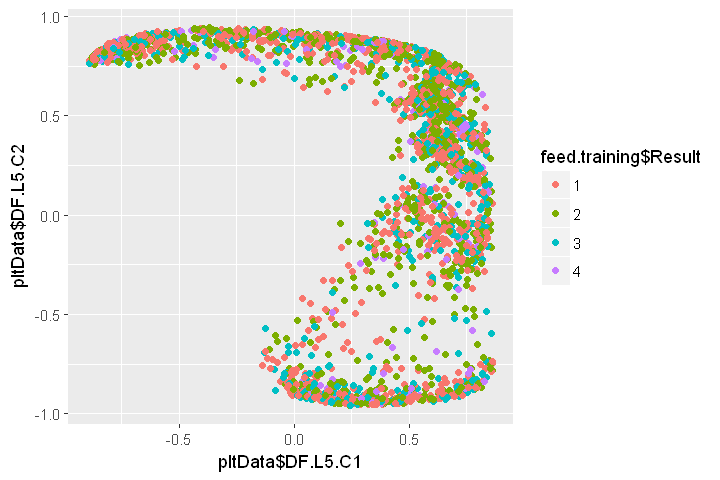

In [56]:
# Initialse h2o.
h2o.init(nthreads = -1)

# Cast the trainig and test sets as h2o objects.
h2_tr <- as.h2o(feed.training,"h2_tr")
h2_ts <- as.h2o(feed.testing,"h2_ts")


# Visualise using autoencoder.
AE <- h2o.deeplearning(
    x = 1:(ncol(feed.training) - 1),
    training_frame = h2_tr,
    hidden = c(33, 23, 13, 3, 2, 3, 13, 23, 33),
    epochs = 600,
    activation = "Tanh",
    autoencoder = TRUE,
    export_weights_and_biases = TRUE
)

# Visualise autoencoder output
tr_sup_ft <- h2o.deepfeatures(AE, h2_tr, layer = 5)
pltData <- as.data.frame(tr_sup_ft)


ggplot(pltData, aes(pltData$DF.L5.C1, pltData$DF.L5.C2, color = feed.training$Result)) + geom_point()

In [58]:
# Helper to bind features.
BindDeepFeatures <- function(features,weights){

    # Attach the autoencoder features.
    dFtMtx <- matrix(nrow = nrow(features),ncol = 13) # Genereate a container for the new features.

    ftMtx_ <- as.matrix(features) # Cast input as matrix.
    pb_ <- txtProgressBar(style = 3) # Progress bar.
    for(i in 1:nrow(ftMtx_)){

        # Drop down through teh layers.
        tmp__ <- weights[[1]] %*% ftMtx_[i,]
        tmp__ <- weights[[2]] %*% tmp__
        tmp__ <- weights[[3]] %*% tmp__

        tmp__ <- t(tmp__) # Transpose


        dFtMtx[i,] <- tmp__ # Concatenate
        setTxtProgressBar(pb_,i/nrow(ftMtx_))
        close(pb_)
    }

    boundMatrix_ <- cbind(ftMtx_,dFtMtx)

    return(as.data.frame(boundMatrix_))
}

### Step 7 :: Bind Autoencoder Output
We will simply read in the weights from a previous run, and wont't use the output from this autoencoder since it's very sensitive to the starting position. For every different autoencoder output we need to retrain our NN model downstream. 

In [59]:
# Read in the weights
ae.weights <- readRDS("AutoEncoderWeights.rds")

# Use the method we defined above to bind the features.
feed.training.deep <- BindDeepFeatures(feed.training[,-ncol(feed.training)],ae.weights)
feed.testing.deep <- BindDeepFeatures(feed.testing[,-ncol(feed.testing)],ae.weights)

  |                                                                      |   0%
  |                                                                      |   0%
  |======================================================================| 100%

In [60]:
# rebind the labels.
feed.training.deep <- as.data.frame(cbind(feed.training.deep,training[,"Result"]))
colnames(feed.training.deep)[ncol(feed.training.deep)] <- "Result"
feed.training.deep[,"Result"] <- as.factor(feed.training.deep[,"Result"])
feed.testing.deep <- as.data.frame(cbind(feed.testing.deep,testing[,"Result"]))
colnames(feed.testing.deep)[ncol(feed.testing.deep)] <- "Result"
feed.testing.deep[,"Result"] <- as.factor(feed.testing.deep[,"Result"])

## Cast as h2o object.
h2_tr <- as.h2o(feed.training.deep,"h2_tr")
h2_ts <- as.h2o(feed.testing.deep,"h2_ts")

  |======================================================================| 100%
  |======================================================================| 100%


## Training the Neural Network.
Neural networks are inherently difficult to train. They are prone to fast overfitting and the loss function is non convex with many local minima. So it's somewhat of a black art in getting it right. In this assignment alone i have built over 100 neural networks on a very very slow core i5.

In [61]:
if(isRetrainAllowed){
    dl_8 <- h2o.deeplearning(# 37.5%
    x = 1:(ncol(h2_tr) - 1),
    y = ncol(h2_tr),
    training_frame = h2_tr,
    validation_frame = h2_ts,
    distribution = "multinomial",
    activation = "MaxoutWithDropout",
    hidden = c(400, 600, 400),
    l2 = 5e-5,
    epochs = 10,
    nfolds = 10,
    balance_classes = TRUE,
    input_dropout_ratio = 0.1,
    loss = "CrossEntropy",
    classification_stop = 0.45
)


prd_8 <- h2o.predict(dl_8, h2_ts)
prd_8 <- as.data.frame(prd_8)
sum(as.numeric(prd_8$predict) == as.numeric(feed.testing.deep$Result)) / 599
}

## The predict.deep method
Below is the implementation of the predict.deep method. the code comments will explain everything that happens.

In [62]:
predict.deep <- function(data,h2oModel = NULL) {
    
    # Input parameters.
    # data :: A dataframe of the input features. Does not take ID or Response variable.

    # Assert that input featurespace must be 10 wide.
    if (ncol(data) != 10) {
        stop("Input features do not match the prostate.csv feature length. Have you forgotton to remove ID and Result columns ?")
    }

    # Assert that h2o is available 
    require(h2o)
    require(caret)
    h2o.init(nthreads = -1)
    # Assert that h2o version is correct
    if (h2o.getVersion() != "3.10.0.8") {
        stop("You have a different version of H2O, get the version 3.10.0.8")
    }


    ## Start feature engineering.

    # Step 1 feature scaling and centering with preprocessor.
    fe.preProcessor <- readRDS("fePreProcessor.rds")

    tr.csyj <- predict(fe.preProcessor, data) # make prediction on new data.


    ## Step 2 :: Spatial Sign transform
    tr.csyj.ss <- as.data.frame(caret::spatialSign(tr.csyj))

    # Bind the new data and redo column names
    feed.training <- cbind(tr.csyj, tr.csyj.ss)
    colnames(feed.training) <- paste("FT", 1:ncol(feed.training), sep = "")

    ## Step 3 :: Add PCA results
    # Read in the model
    pcaModel_ <- readRDS("pcaModel.rds")

    tr.csyj.ss.pca <- pcaModel_$prcompObj$rotation * feed.training # matrix multiply the weights into the features.
    feed.training <- cbind(feed.training, tr.csyj.ss.pca) # Bind the existing data.
    colnames(feed.training) <- paste("FT", 1:ncol(feed.training), sep = "") # Generalise feature names.

    ## Step 4 :: Row sums of 2 PCA components.
    tr.csyj.ss.pca.sum <- rowSums((pcaModel_$prcompObj$rotation * tr.csyj.ss.pca)[, 1:2])
    feed.training <- cbind(feed.training, tr.csyj.ss.pca.sum)
    colnames(feed.training) <- paste("FT", 1:ncol(feed.training), sep = "")

    ## Step 5 :: Frequency values of features
    source("FE.r")
    tr.colsum <- my.f2cnt(data, "ATT1", "ATT2")
    feed.training <- cbind(feed.training, tr.colsum)
    colnames(feed.training) <- paste("FT", 1:ncol(feed.training), sep = "")

    # Step 6 :: Scale and center everything

    feed.training <- scale(feed.training)

    # Step 7 :: Bind autoencoder output

    # Read in the autoencoder weights
    ae.weights <- readRDS("AutoEncoderWeights.rds")

    # Helper to bind features.
    BindDeepFeatures <- function(features, weights) {

        # Attach the autoencoder features.
        dFtMtx <- matrix(nrow = nrow(features), ncol = 13) # Genereate a container for the new features.

        ftMtx_ <- as.matrix(features) # Cast input as matrix.
        for (i in 1:nrow(ftMtx_)) {

            # Drop down through teh layers.
            tmp__ <- weights[[1]] %*% ftMtx_[i,]
            tmp__ <- weights[[2]] %*% tmp__
            tmp__ <- weights[[3]] %*% tmp__

            tmp__ <- t(tmp__) # Transpose


            dFtMtx[i,] <- tmp__ # Concatenate
        }

        boundMatrix_ <- cbind(ftMtx_, dFtMtx)

        return(as.data.frame(boundMatrix_))
    }

    # bind features
    feed.training.deep <- BindDeepFeatures(feed.training, ae.weights)

    # Cast h2o object.
    h2_tr <- as.h2o(feed.training.deep, "h2_tr")

    # Get the neural network model or use passed model.
    if (is.null(h2oModel)) {
        mdl_ <- h2o.loadModel("DeepLearning_model_R_1480681170824_1")
    } else {
        mdl_ <- h2oModel;
    }

    pred <- as.data.frame(h2o.predict(mdl_, h2_tr)) # return predictions as dataframe.

    return(pred[,"predict"])
}

In [77]:
pred_dl <- predict.deep(test[,c(-ncol(test))])

 Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         8 minutes 26 seconds 
    H2O cluster version:        3.10.0.8 
    H2O cluster version age:    1 month and 23 days  
    H2O cluster name:           H2O_started_from_R_jmills_uem511 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   1.72 GB 
    H2O cluster total cores:    4 
    H2O cluster allowed cores:  4 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    R Version:                  R version 3.3.1 (2016-06-21) 

  |======================================================================| 100%
  |======================================================================| 100%


In [78]:
confusionMatrix(actual, pred_dl)

Confusion Matrix and Statistics

          Reference
Prediction   0   1   2   3
         0 103  58  48   5
         1 101  71  31   1
         2  65  45  36   1
         3  17   6   9   3

Overall Statistics
                                        
               Accuracy : 0.355         
                 95% CI : (0.317, 0.395)
    No Information Rate : 0.477         
    P-Value [Acc > NIR] : 1             
                                        
                  Kappa : 0.046         
 Mcnemar's Test P-Value : 0.00000925    

Statistics by Class:

                     Class: 0 Class: 1 Class: 2 Class: 3
Sensitivity             0.360    0.394    0.290   0.3000
Specificity             0.646    0.683    0.767   0.9458
Pos Pred Value          0.481    0.348    0.245   0.0857
Neg Pred Value          0.526    0.725    0.806   0.9876
Prevalence              0.477    0.300    0.207   0.0167
Detection Rate          0.172    0.118    0.060   0.0050
Detection Prevalence    0.357    0.340    

---
# X. Ensemble the Predictions

In [402]:
# create a dataframe to store each of the predictions from each of the models we want to ensemble
preds_df <- data.frame(matrix(ncol = 0, nrow =600))

In [403]:
preds_df$pred_knn <- pred_knn
preds_df$pred_xgb <- pred_xgb
preds_df$pred_rf <- pred_rforest
preds_df$pred_xgb_prcomp <- pred_xgb_prcomp
preds_df$pred_dl <- pred_dl

In [404]:
head(preds_df)

,pred_knn,pred_xgb,pred_rf,pred_xgb_prcomp
1,1,1,3,1
2,1,1,1,1
3,1,0,0,0
4,1,0,1,0
5,1,1,2,1
6,0,0,3,0


In [405]:
table(preds_df$pred_xgb)


  0   1   2   3 
216 236 113  35 

In [406]:
preds_df <- Udf.Utilities.MajorityVotePredictions(preds_df)

In [407]:
head(preds_df)

,pred_knn,pred_xgb,pred_rf,pred_xgb_prcomp,majority_pred
1,1,1,3,1,1
2,1,1,1,1,1
3,1,0,0,0,0
4,1,0,1,0,1
5,1,1,2,1,1
6,0,0,3,0,0


In [408]:
confusionMatrix(actual, preds_df$majority_pred)

Confusion Matrix and Statistics

          Reference
Prediction  0  1  2  3
         0 82 89 32 11
         1 80 96 22  6
         2 63 60 18  6
         3 18 10  6  1

Overall Statistics
                                        
               Accuracy : 0.328         
                 95% CI : (0.291, 0.368)
    No Information Rate : 0.425         
    P-Value [Acc > NIR] : 1             
                                        
                  Kappa : 0.008         
 Mcnemar's Test P-Value : 0.0000266     

Statistics by Class:

                     Class: 0 Class: 1 Class: 2 Class: 3
Sensitivity             0.337    0.376    0.231  0.04167
Specificity             0.630    0.687    0.753  0.94097
Pos Pred Value          0.383    0.471    0.122  0.02857
Neg Pred Value          0.583    0.598    0.868  0.95929
Prevalence              0.405    0.425    0.130  0.04000
Detection Rate          0.137    0.160    0.030  0.00167
Detection Prevalence    0.357    0.340    0.245  0.05833
Balan

---
# X. Summary Report

# References <a class="anchor" id="References"></a>

James, G., Witten, D., Hastie, T., Tibshirani, R. (2015). "Introduction to Statistical Learning with Applications in R". New York: Springer.  

Kuhn, M., Johnson, K. (2013). "Applied Predictive Modeling", New York: Springer.